# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


In [4]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


# **Базовое решение и пример формирования файла под submission**


In [5]:
!pip install catboost -q


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [7]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [8]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 30945.00it/s]


In [9]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=3)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.5
0:	learn: 0.2082395	total: 542ms	remaining: 1.08s
1:	learn: 0.1360790	total: 896ms	remaining: 448ms
2:	learn: 0.1180984	total: 1.32s	remaining: 0us


In [10]:
predictions = cb.predict_proba(df_test.fillna(''))

In [11]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
sub.head()

,TransactionID,isFraud
0,3404559,0.978714
1,3404560,0.935724
2,3404561,0.946864
3,3404562,0.978714
4,3404563,0.970637


In [ ]:
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [13]:
!pip install category_encoders -q


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install catboost -q
!pip install lightgbm -q


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import re
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

sns.set()

%matplotlib inline

In [16]:
INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

In [17]:
train_transaction.shape, train_identity.shape, test_transaction.shape, test_identity.shape

((417559, 394), (110666, 41), (172981, 393), (33567, 41))

In [18]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.2+ GB


In [19]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110666 entries, 0 to 110665
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  110666 non-null  int64  
 1   id_01          110666 non-null  float64
 2   id_02          108160 non-null  float64
 3   id_03          49500 non-null   float64
 4   id_04          49500 non-null   float64
 5   id_05          105299 non-null  float64
 6   id_06          105299 non-null  float64
 7   id_07          3945 non-null    float64
 8   id_08          3945 non-null    float64
 9   id_09          56554 non-null   float64
 10  id_10          56554 non-null   float64
 11  id_11          108273 non-null  float64
 12  id_12          110666 non-null  object 
 13  id_13          96110 non-null   float64
 14  id_14          64072 non-null   float64
 15  id_15          108273 non-null  object 
 16  id_16          99590 non-null   object 
 17  id_17          107259 non-nul

In [21]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


В данных много пропусков и не оптимизированы типы

In [22]:
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [23]:
del train_transaction, train_identity, test_transaction, test_identity

In [24]:
df_train.shape

(417559, 434)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.4+ GB


Оптимизирую датасет и заполню пропуски в нем

In [ ]:
# Функция для оптимизации типов взята из https://colab.research.google.com/drive/1iOloUogDTWGLQceR1gkkVfVccSpDs_E0#scrollTo=VGs-EFXQMW4u&line=6&uniqifier=1

def reduce_mem_usage(df):
    NAlist = [] # Keeps track of columns that have missing values filled in.
    for col in tqdm(df.columns):
        if df[col].dtype != object:  # Exclude strings

            # make variables for Int, max and min
            IsInt = False
            col_max_value = df[col].max()
            col_min_value = df[col].min()

            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all():
                NAlist.append(col)
                df[col] = df[col].fillna(col_min_value - 1)

            # test if column can be converted to an integer
            col_as_int = df[col].fillna(0).astype(np.int64)
            diff = (df[col] - col_as_int)
            diff = diff.sum()
            if np.abs(diff) < 0.01:
                IsInt = True

            # Make Integer datatypes
            if IsInt:
                if col_min_value > np.iinfo(np.int8).min and col_max_value < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min_value > np.iinfo(np.int16).min and col_max_value < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min_value > np.iinfo(np.int32).min and col_max_value < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif col_min_value > np.iinfo(np.int64).min and col_max_value < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)

            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
        else:
            df[col] = df[col].fillna('unseen_category')

    return df, NAlist

In [27]:
df_train, df_train_NAlist = reduce_mem_usage(df_train)
df_test, df_test_NAlist = reduce_mem_usage(df_test)

100%|██████████| 433/433 [00:02<00:00, 157.01it/s]


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float32(80), int16(60), int32(3), int8(260), object(31)
memory usage: 382.3+ MB


id_01 - id _38: анонимизированные признаки. Попробую деанонимизировать некоторые признаки...

In [29]:
for col in [f'id_{"{:02d}".format(num)}' for num in range(1, 39)]:
  print(f"Column: {col}")
  print(df_train[col].unique())
  print('\n')

Column: id_01
[-101    0   -5  -15  -10  -20  -40  -30  -25  -55  -45  -70  -90 -100
  -65  -60  -75  -72  -50  -21  -35  -85  -64  -80  -95  -87  -58   -7
  -12  -11   -9  -27  -42   -6  -62  -18  -76  -23  -19  -99  -13  -26
  -31  -17  -22  -14  -34  -54  -53  -28  -88  -16  -61  -46  -94  -24
  -93  -44  -89  -92  -37  -96  -57  -29  -33  -32   -8  -52  -43  -38]


Column: id_02
[    29  70787  98945 ... 386272 818972 265769]


Column: id_03
[-13   0   3   2   5   1   6   9   4  -5  -9  -2  -4  -1  -3  -7  -6 -11
   7  -8  10 -10   8 -12]


Column: id_04
[-29   0 -11  -5  -8  -1  -6  -9  -3 -13  -4 -10  -7 -12  -2 -28]


Column: id_05
[-73   0   1   3   2   9  12   6   4  21   7   5  18  17  -1  11   8  10
 -10  -8  40  13  19  -3  14  22  -4  15  23  24  -2  41  20  -5  31  50
  -9  25  27  -7  33 -26 -11  26  32  42  29  -6  16 -21 -12 -16  28  34
 -30  30  39 -28  38 -27  37 -13 -15 -14 -18  52  35 -17 -23 -25  48 -20
 -31  36 -19  47 -34 -24  43  46  45  44 -33 -22 -29 -72 -37 

- столбец id_23 содержит данные о прокси (категориальный признак);
- id_30 - операционную систему пользователя (категориальный признак);
- id_31 - браузер, через который осуществлялась идентификация (категориальный признак);
- id_33 - разрешение экрана пользователя (категориальный признак). Есть разрешение 0x0 - скорее всего, это не пользователь, а машина (возможно, fraud);
- id_34 - статус совпадения (категориальный признак);

Также строковые категориальные признаки в столбцах: id_12, id_15, id_16, id_27, id_28, id_29 и категориальные признаки (T/F) с пропусками: id_35 - id_38

Проверю сбалансированность классов

<Axes: >

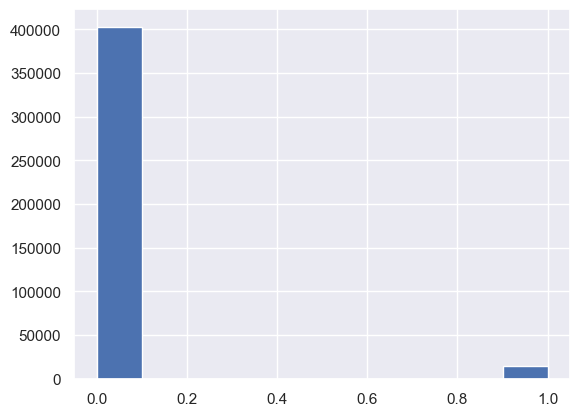

In [30]:
df_train['isFraud'].hist()

Классы сильно несбалансированы: мошеннических транзакций значительно меньше, чем обычных транзакций

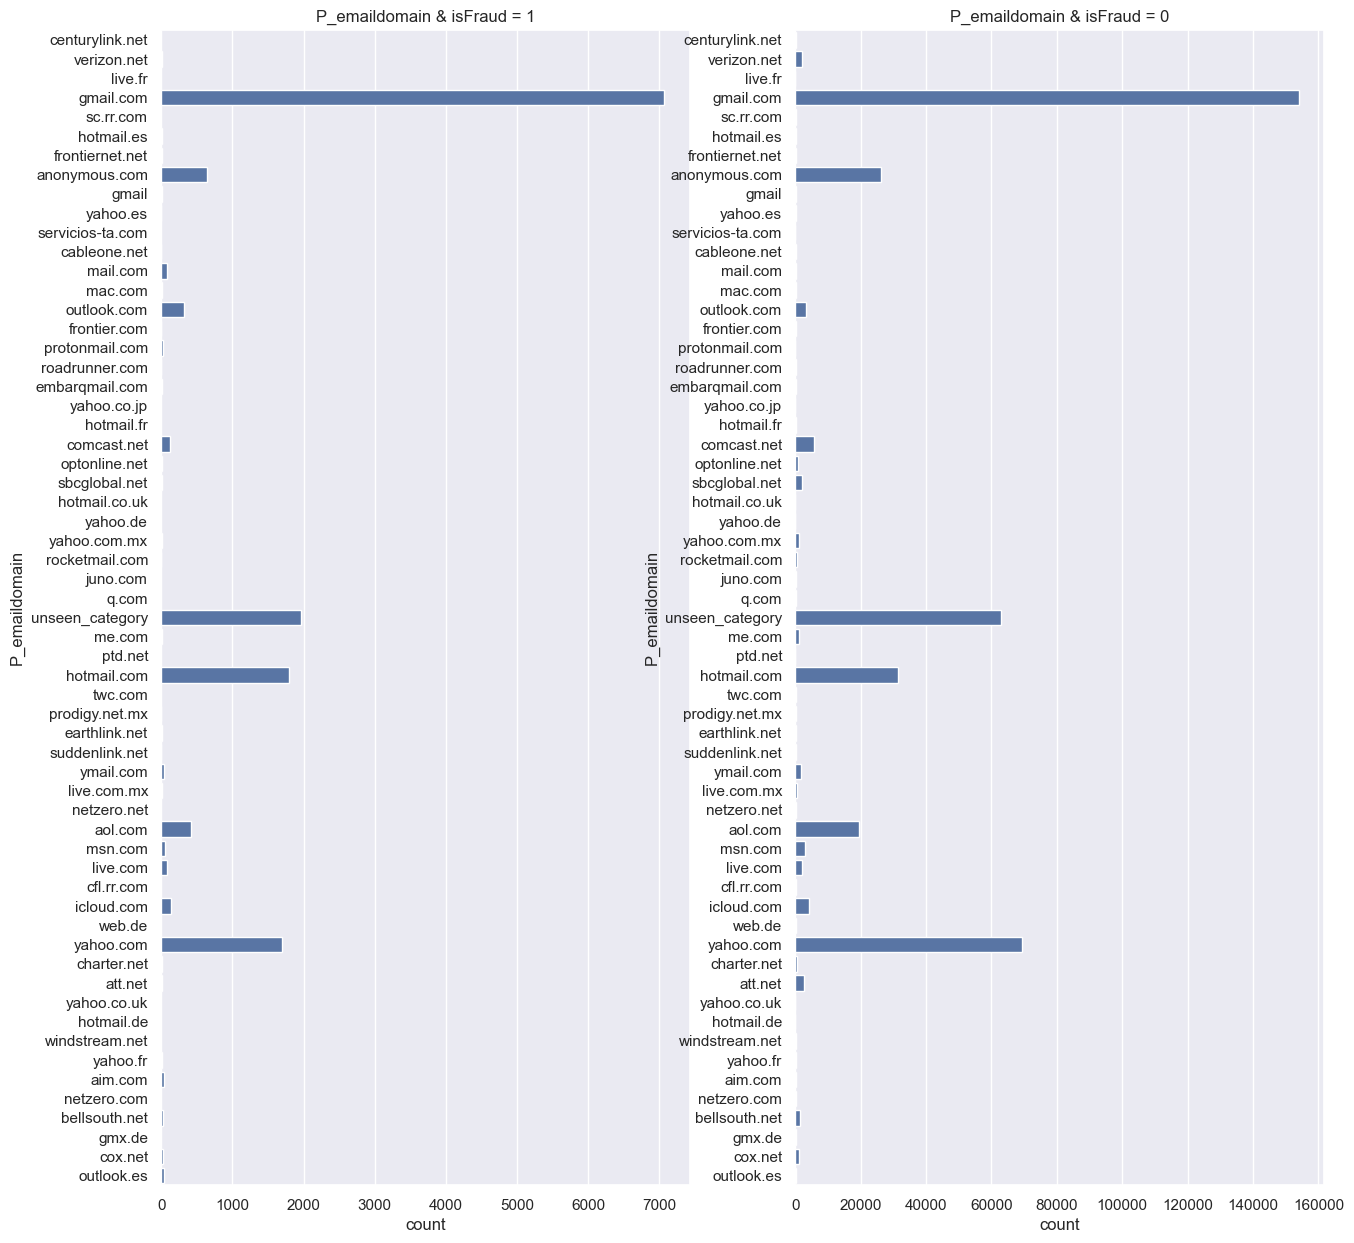

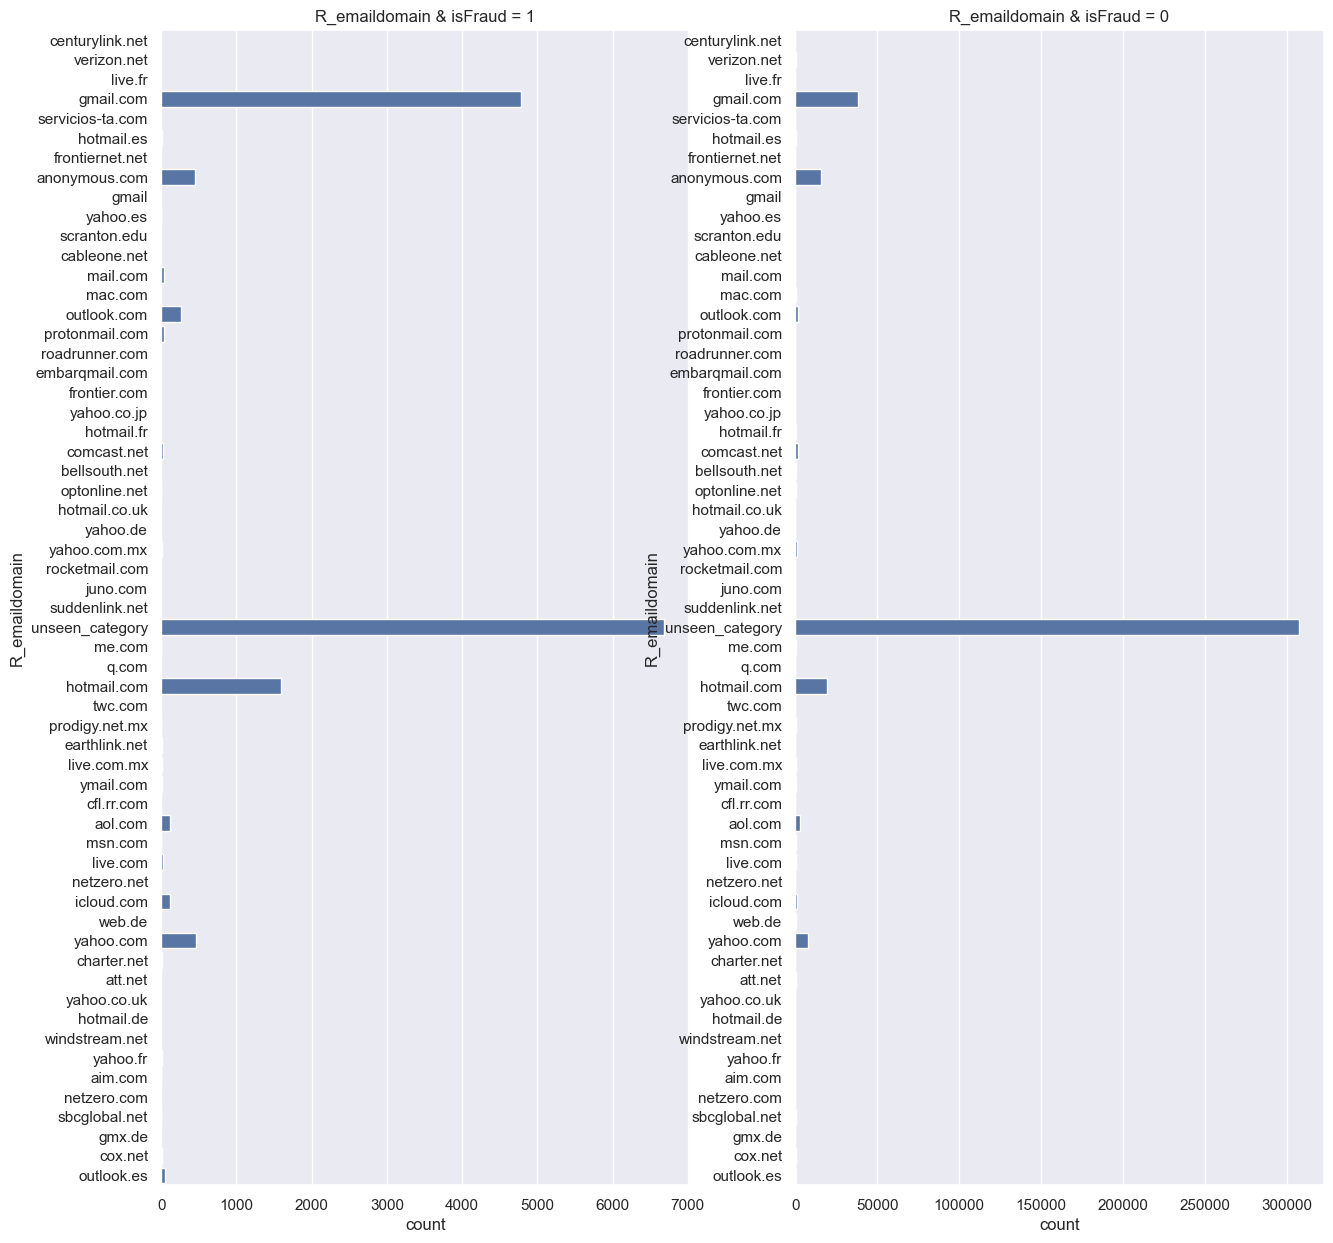

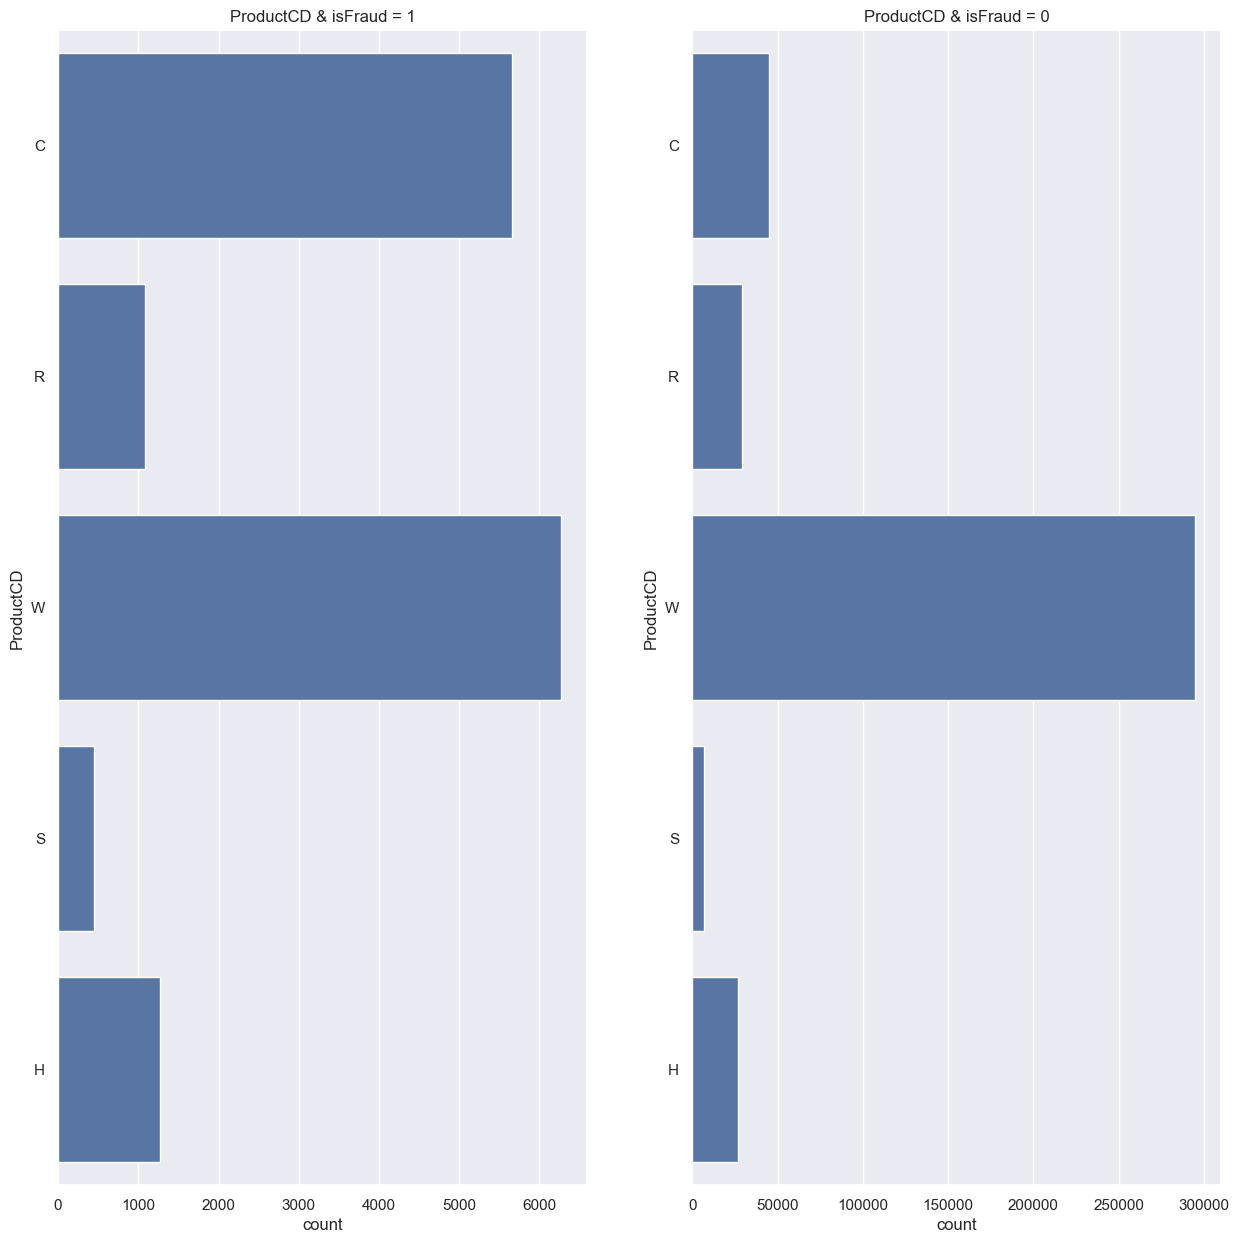

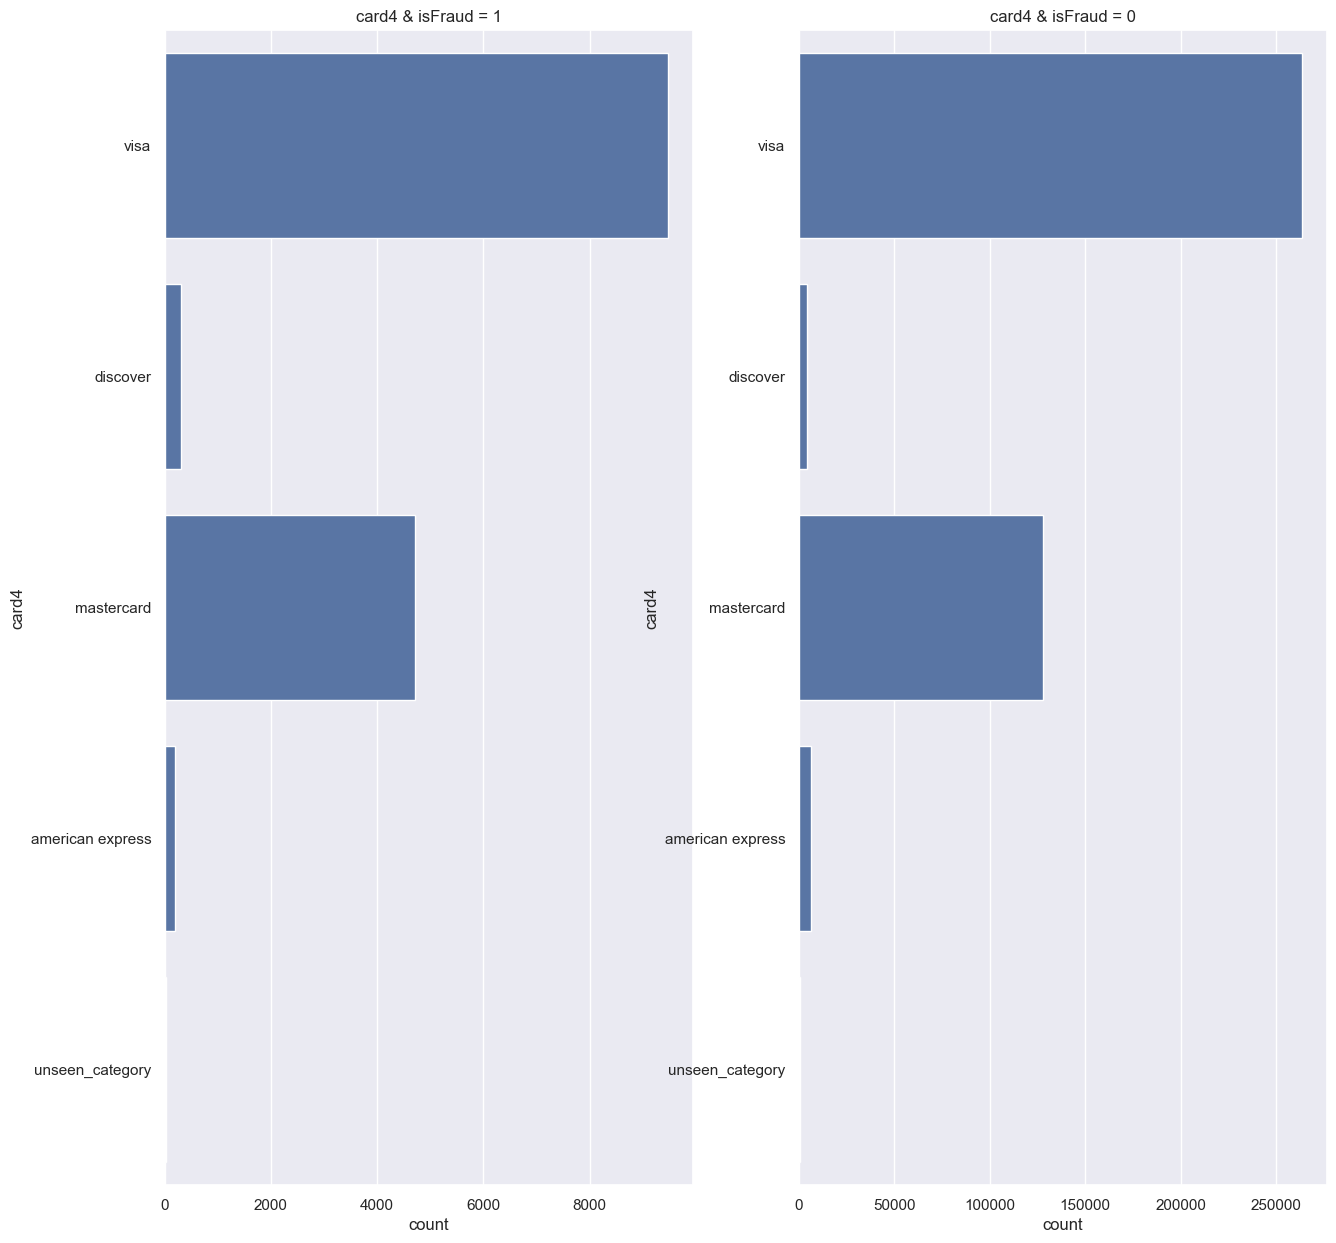

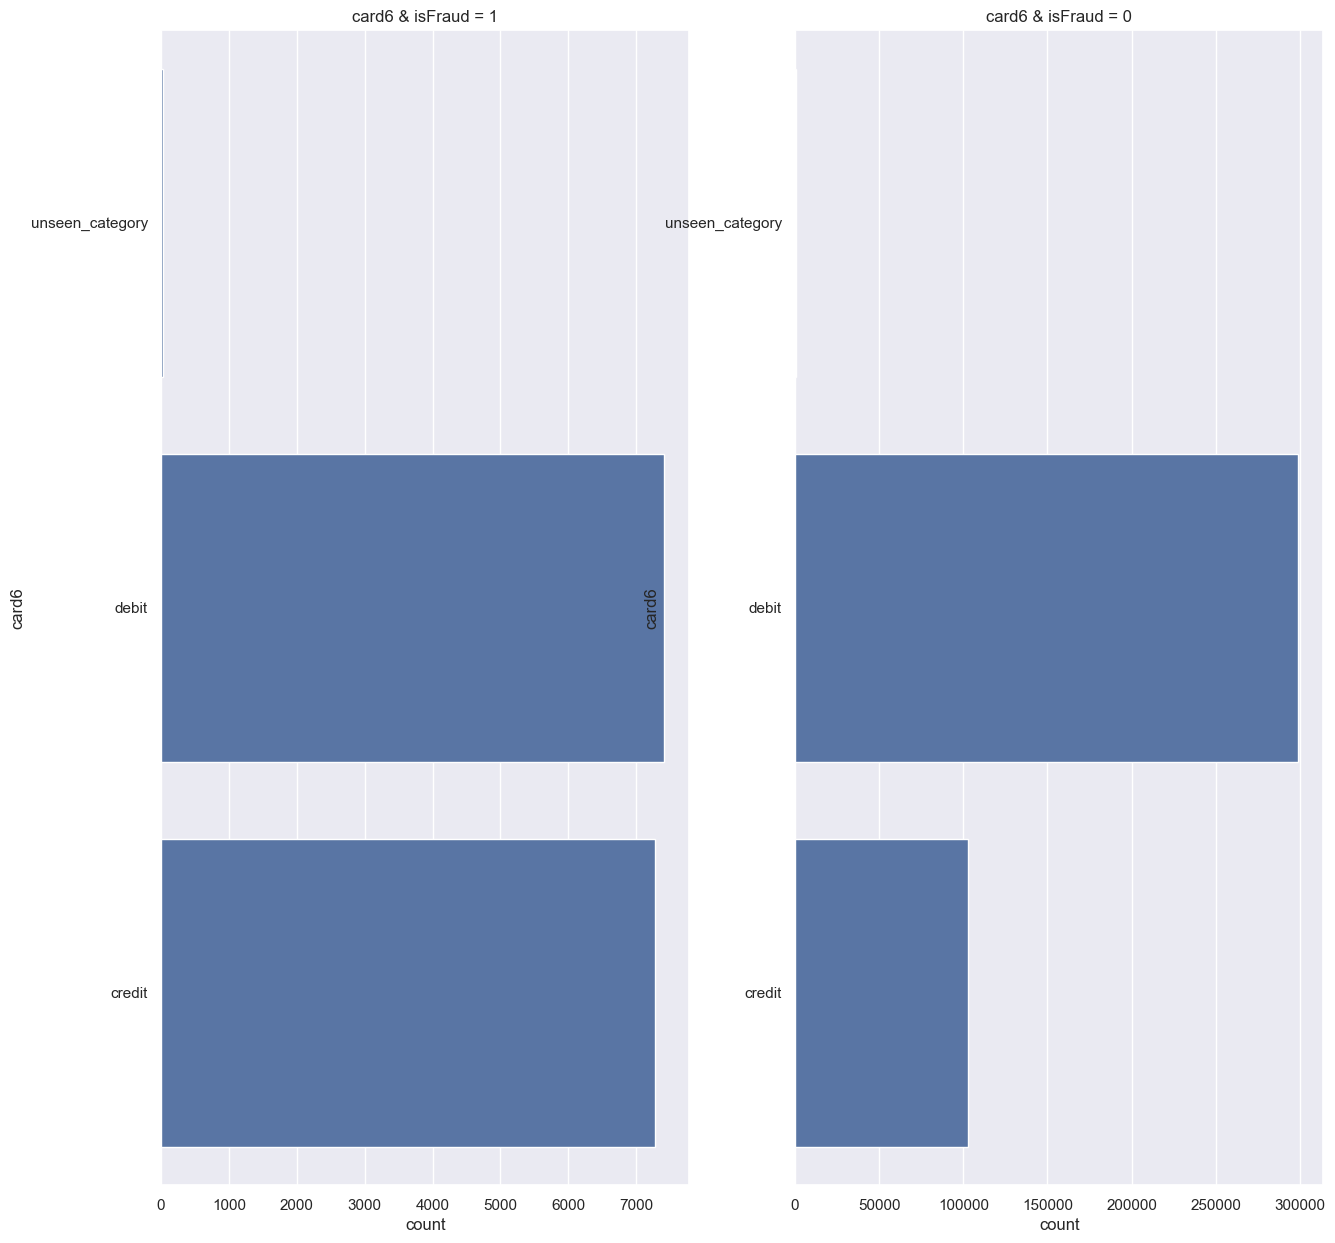

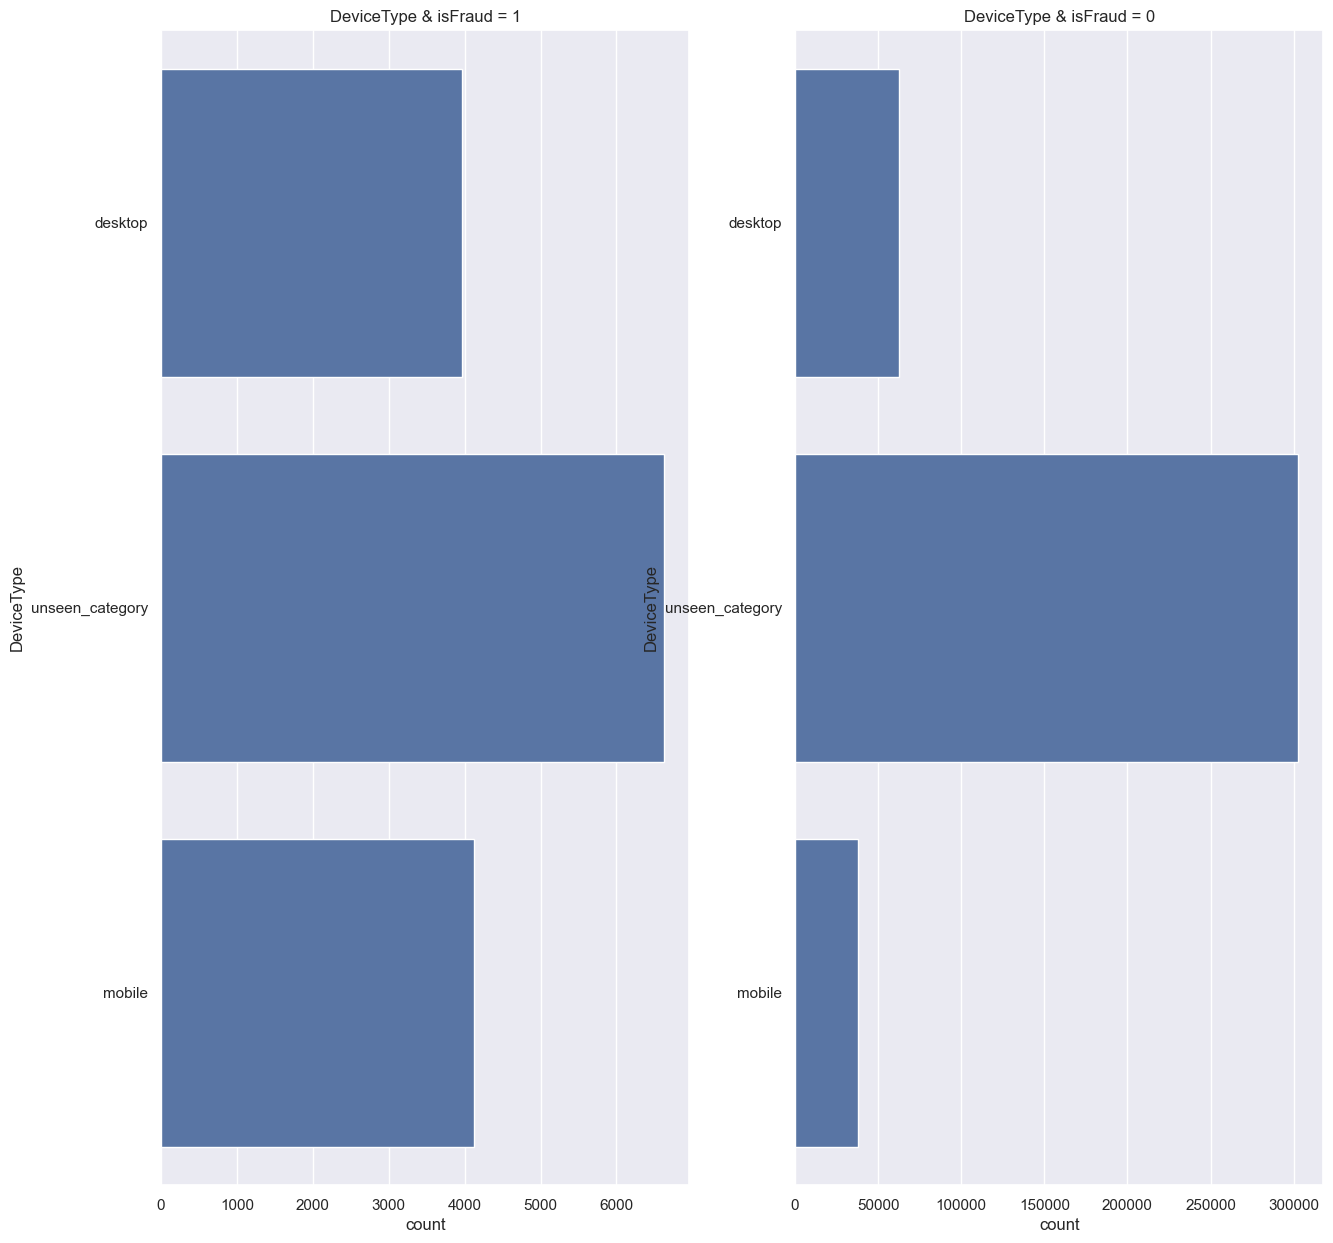

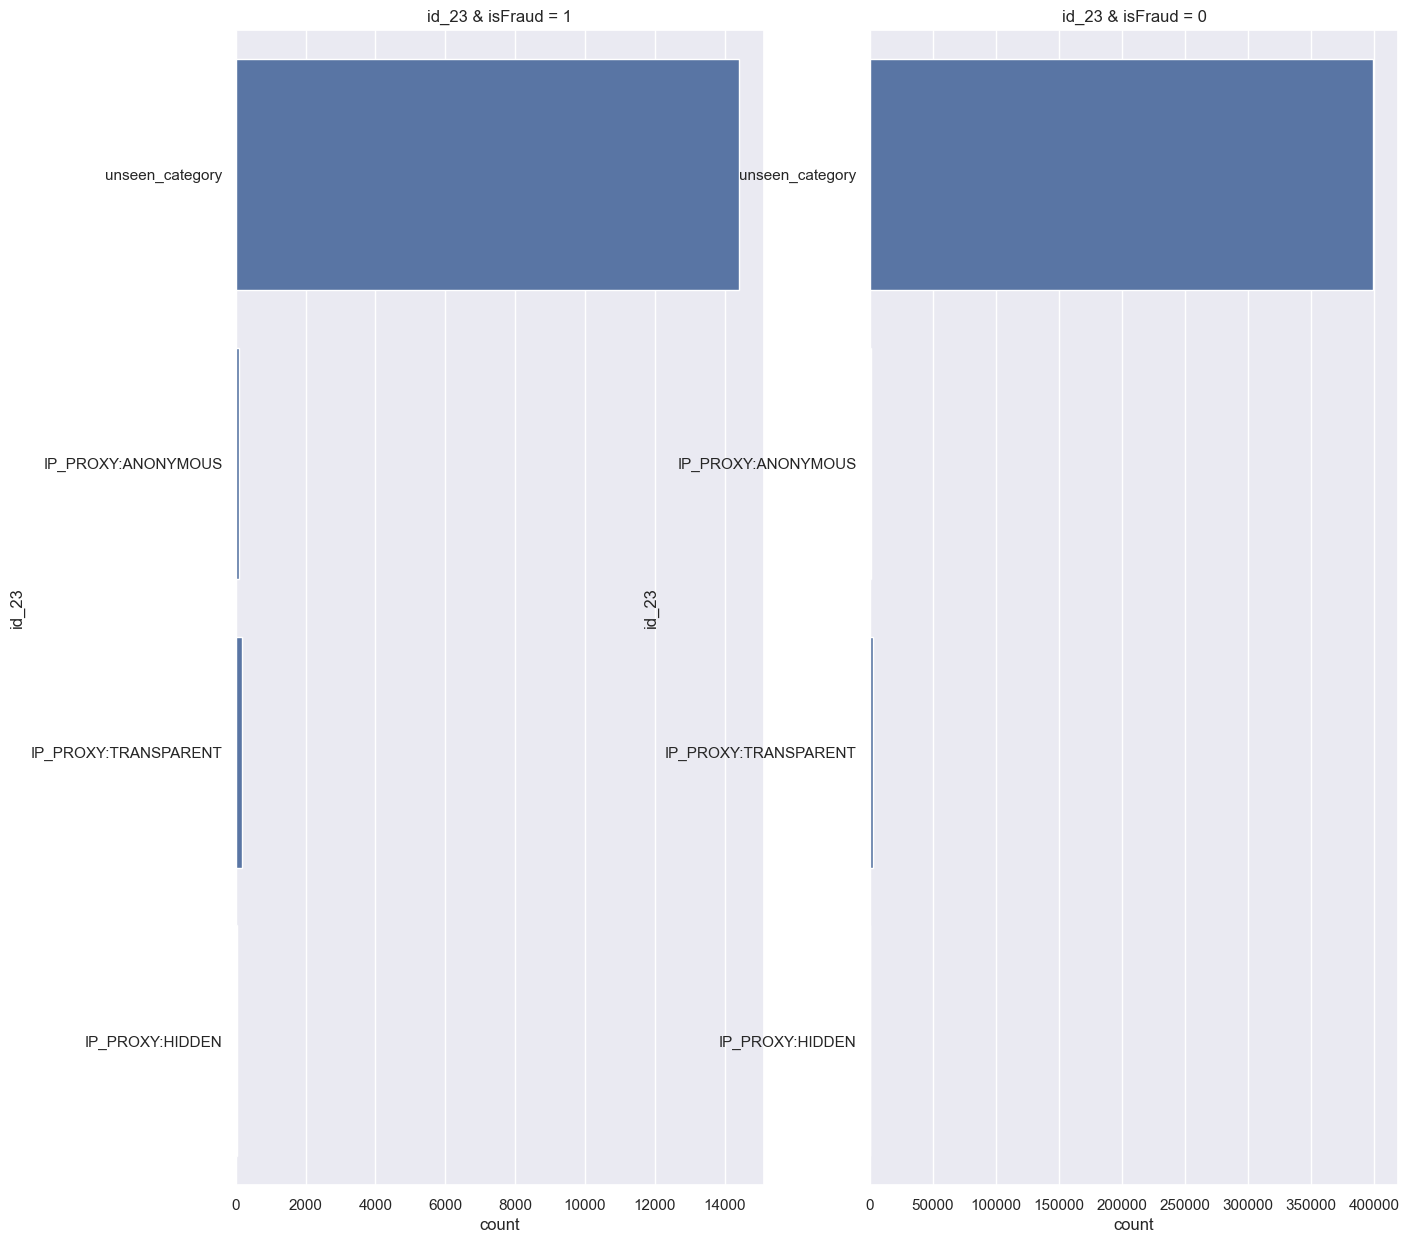

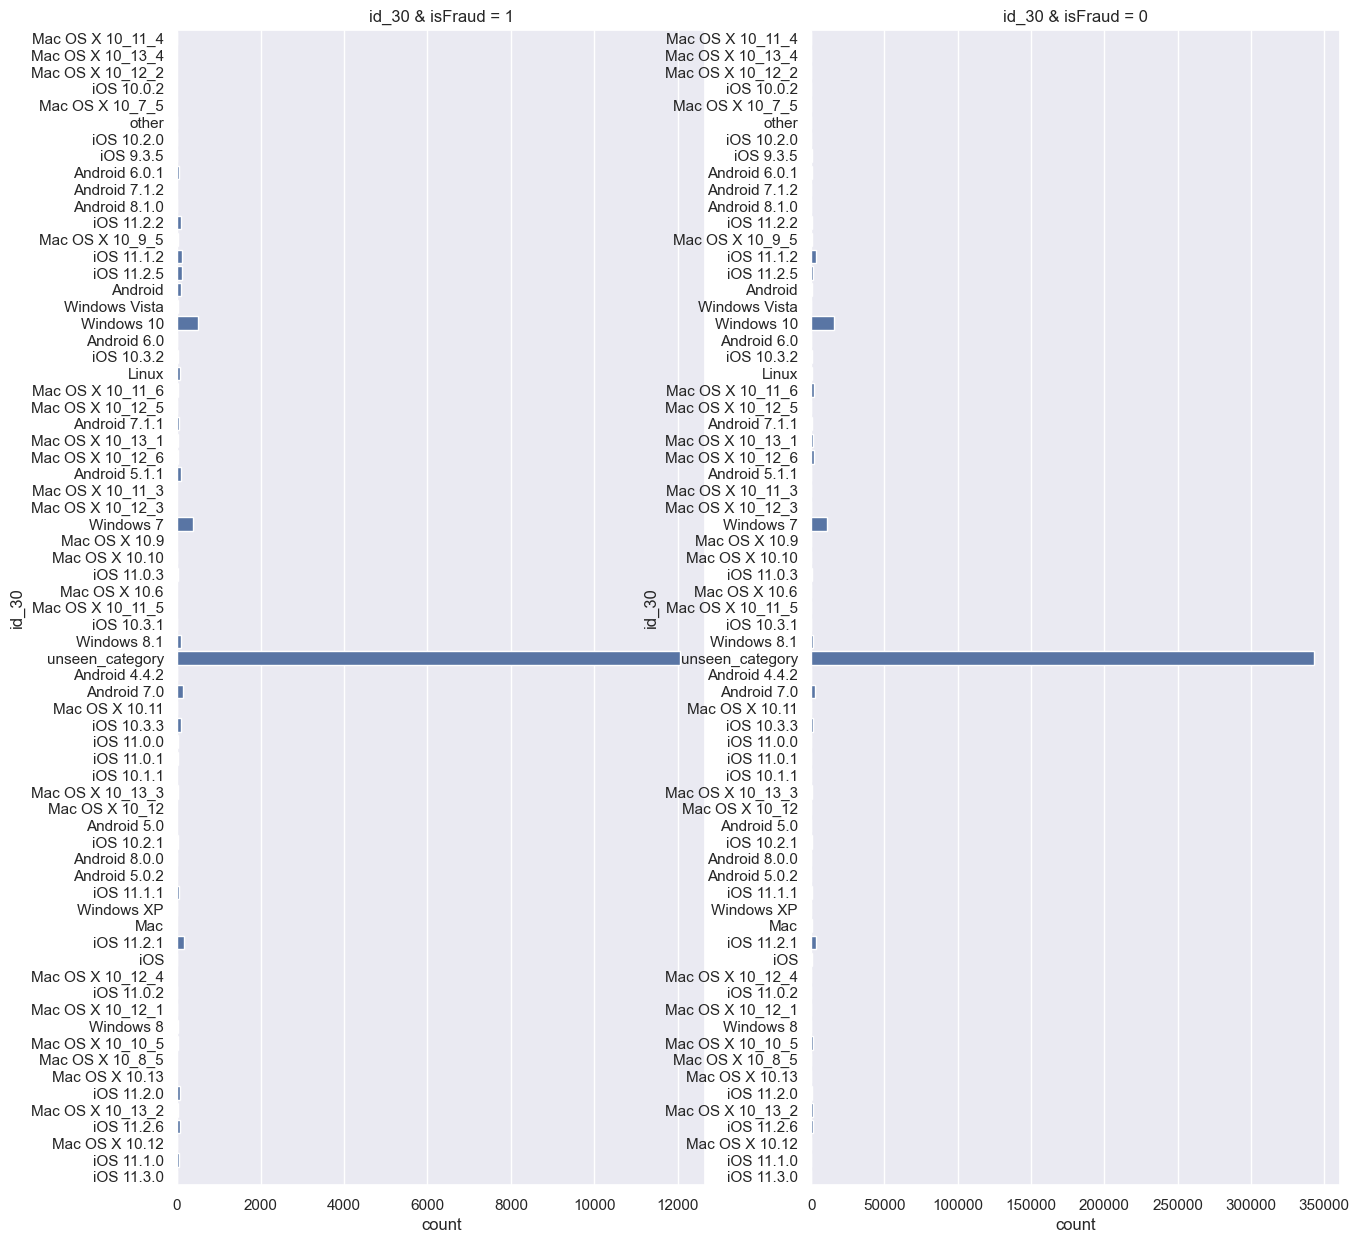

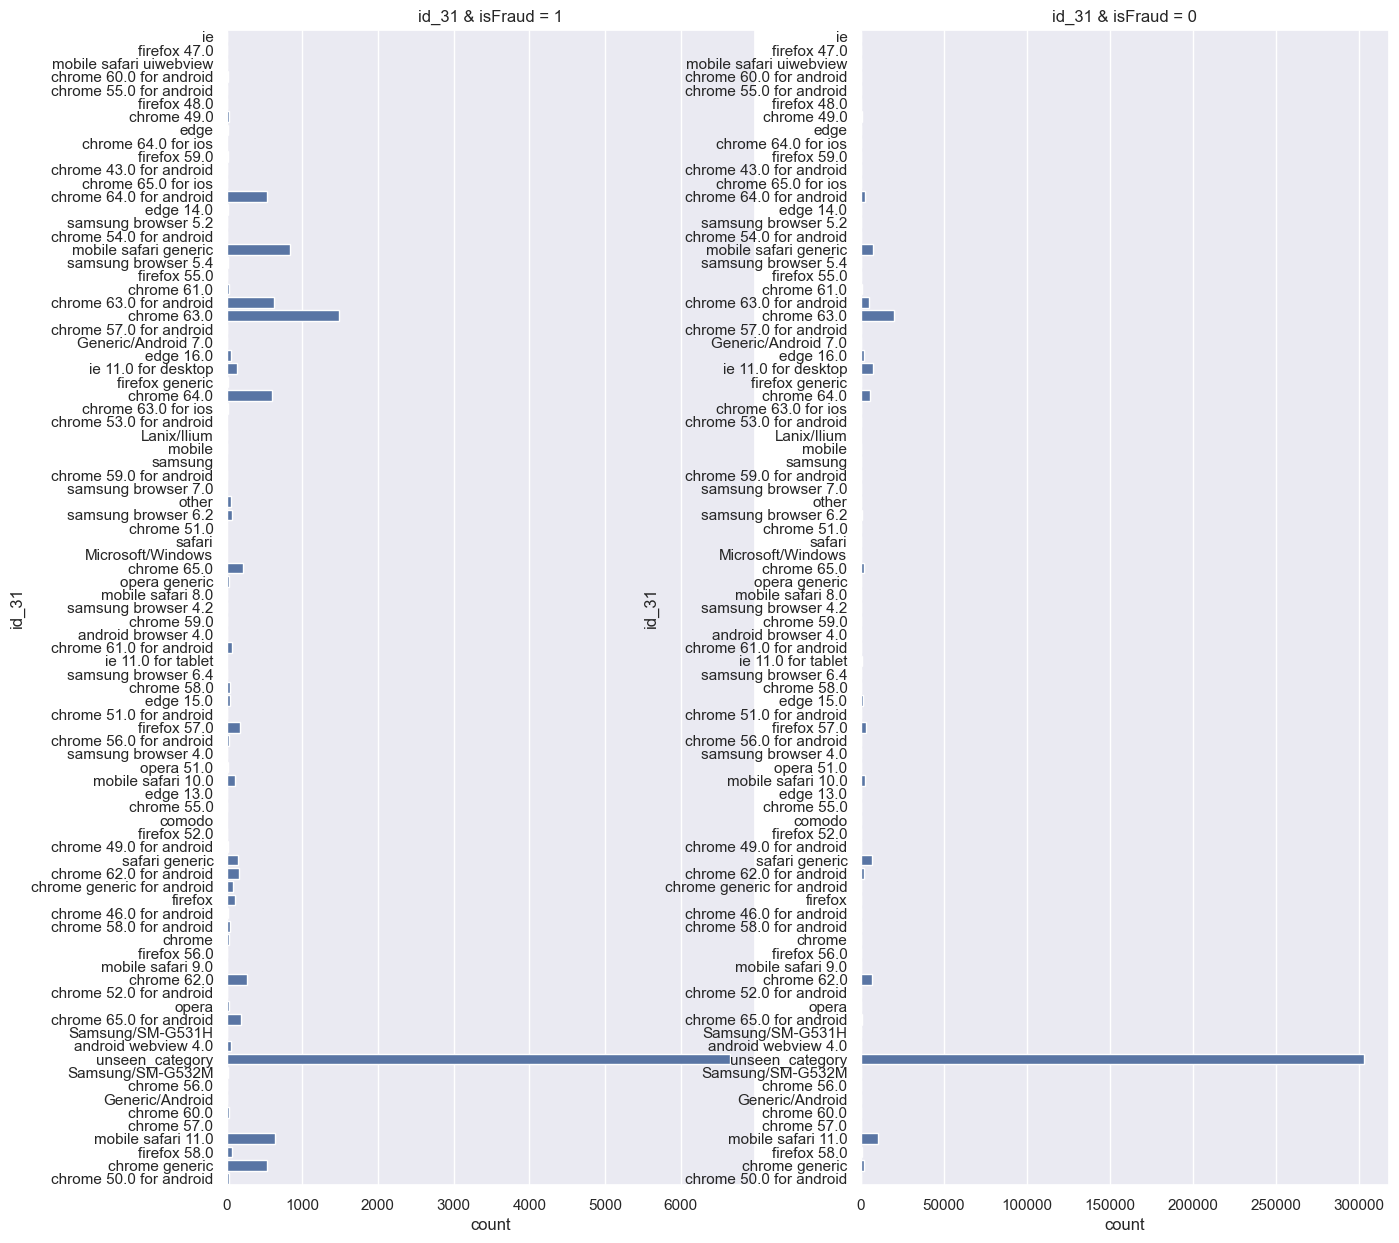

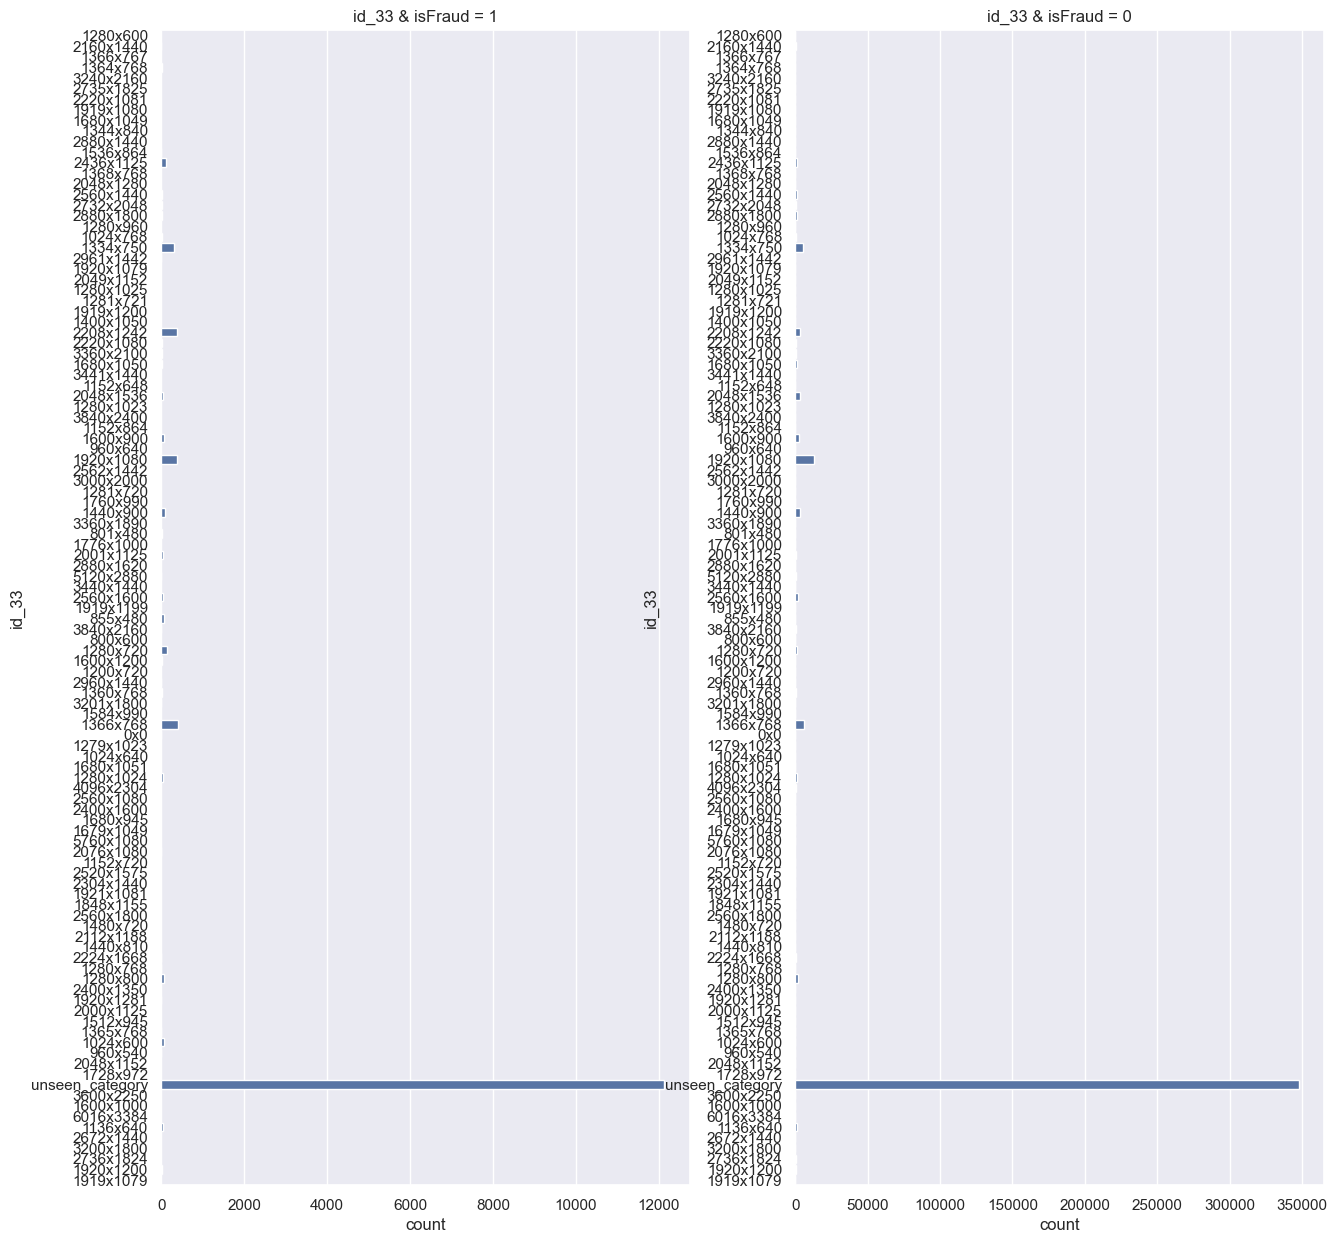

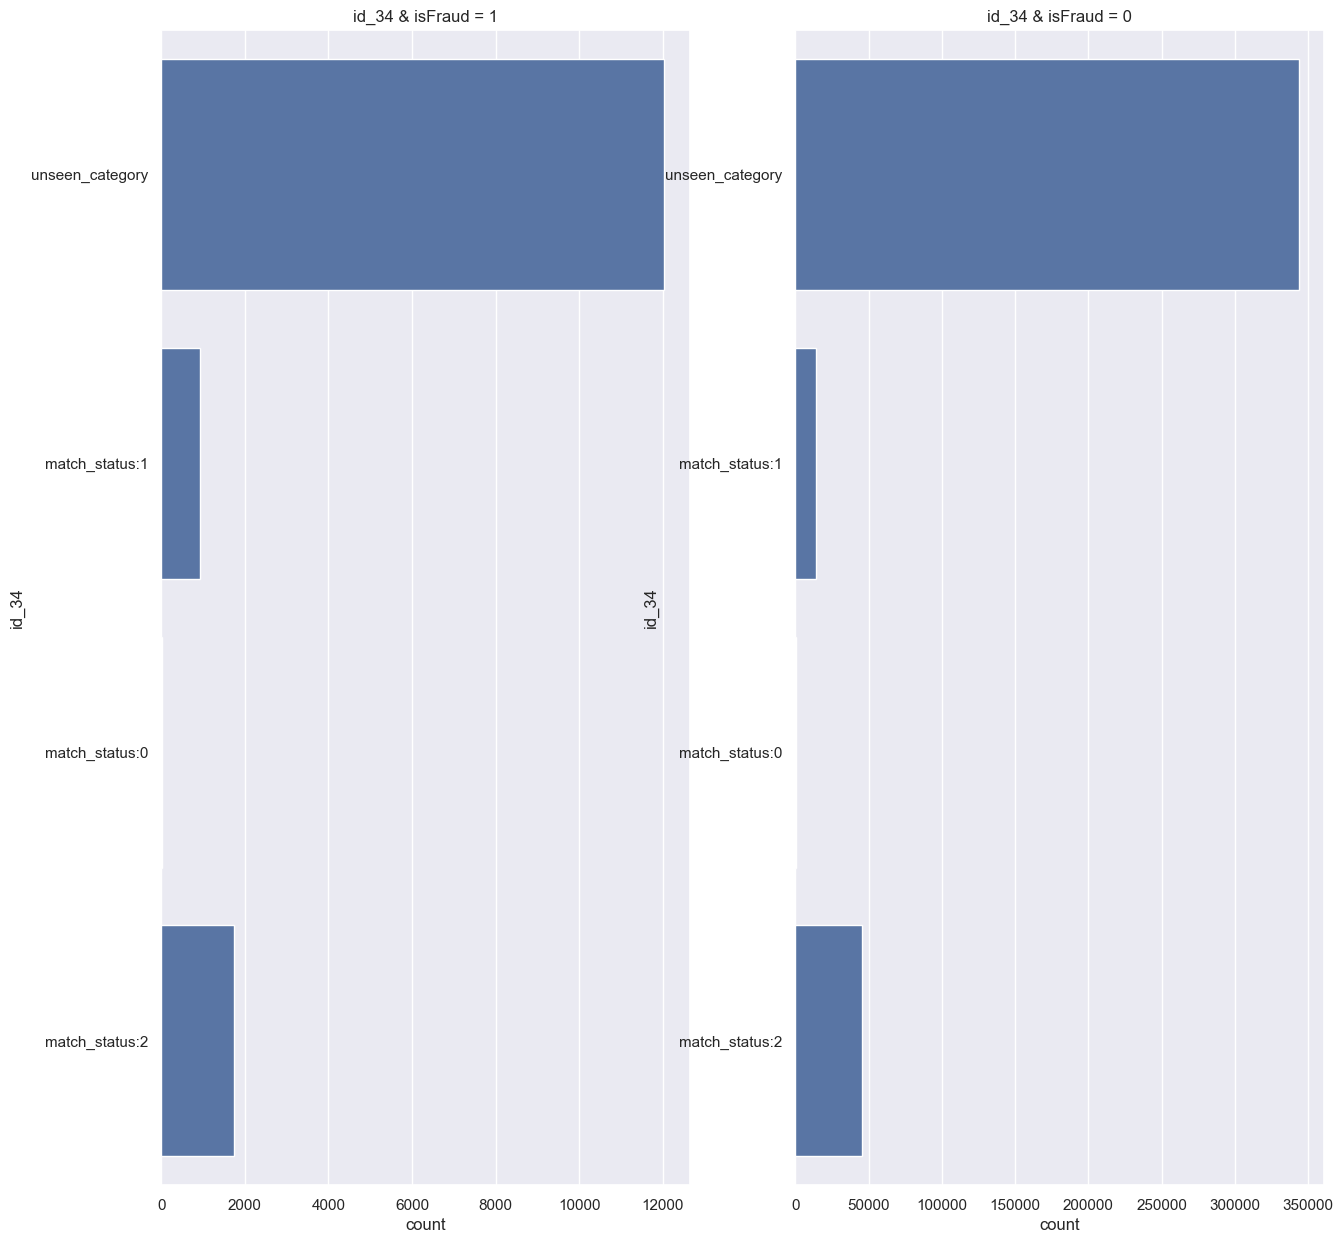

In [31]:
cols_target = ['P_emaildomain', 'R_emaildomain', 'ProductCD', 'card4', 'card6', 'DeviceType', 'id_23', 'id_30', 'id_31', 'id_33', 'id_34']

for col in cols_target:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
    unique_values = [x for x in list(set(df_train[col].values).intersection(set(df_test[col].values))) if str(x) != 'nan']
    sns.countplot(y=col, ax=ax[0], data=df_train.loc[df_train['isFraud'] == 1], order=unique_values)
    ax[0].set_title(col + ' & isFraud = 1')
    sns.countplot(y=col, ax=ax[1], data=df_train.loc[df_train['isFraud'] == 0], order=unique_values)
    ax[1].set_title(col + ' & isFraud = 0')
    plt.show()

Для предсказываемого класса сильно чаще встречается категория "C" в ProductCD, категория "credit" для card6**, **"mobile" для DeviceType

Остальные категории не сильно отличаются между классами. В рассмотренных категориях очень много пропущенных значений ("unseen_category")

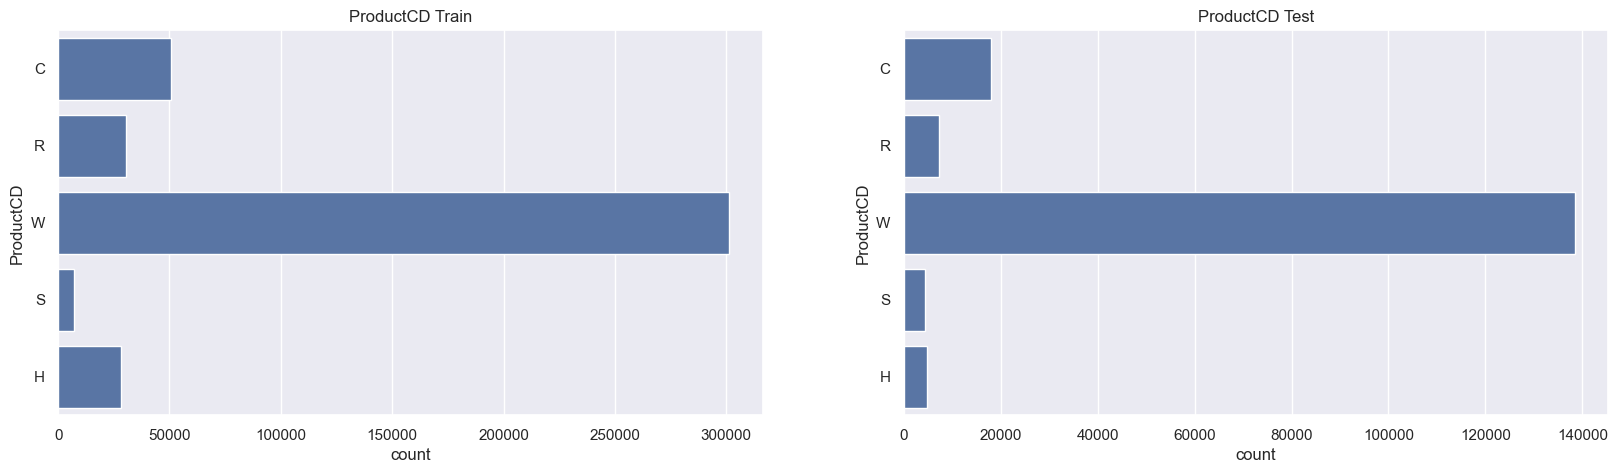

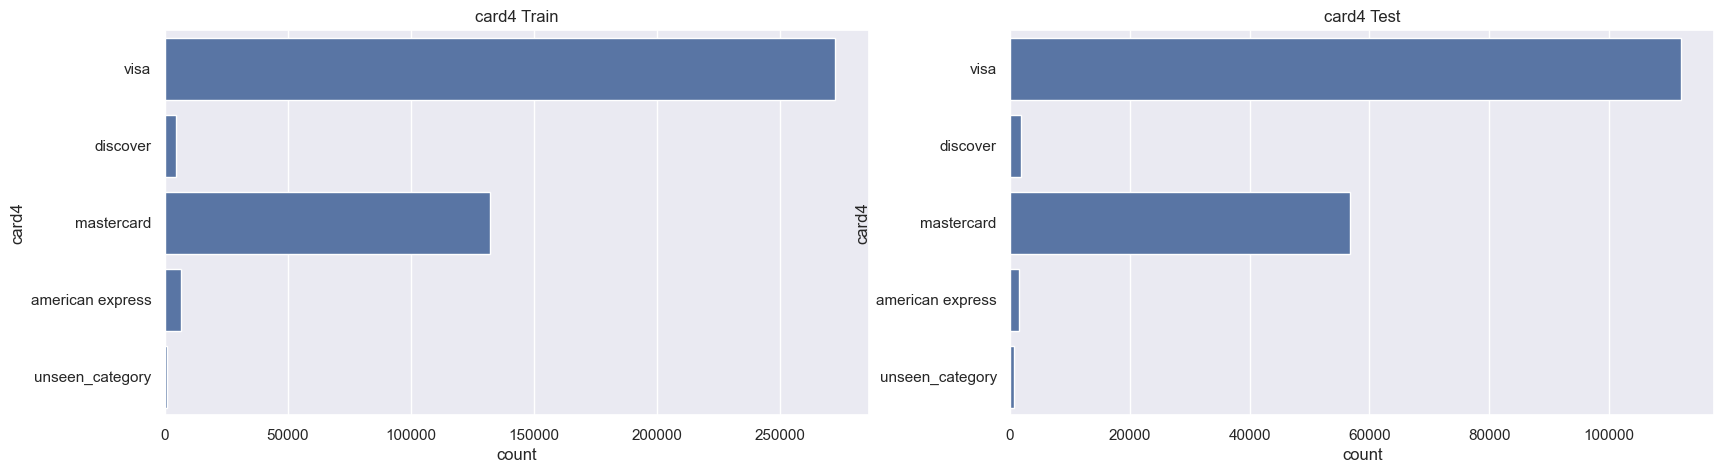

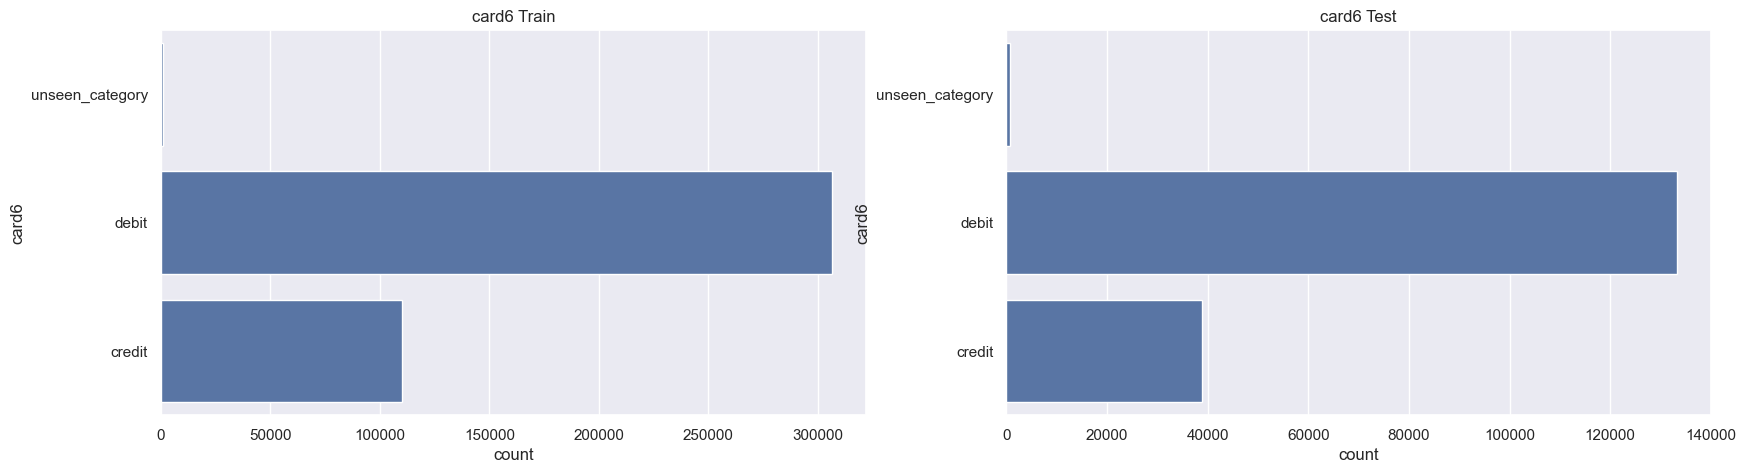

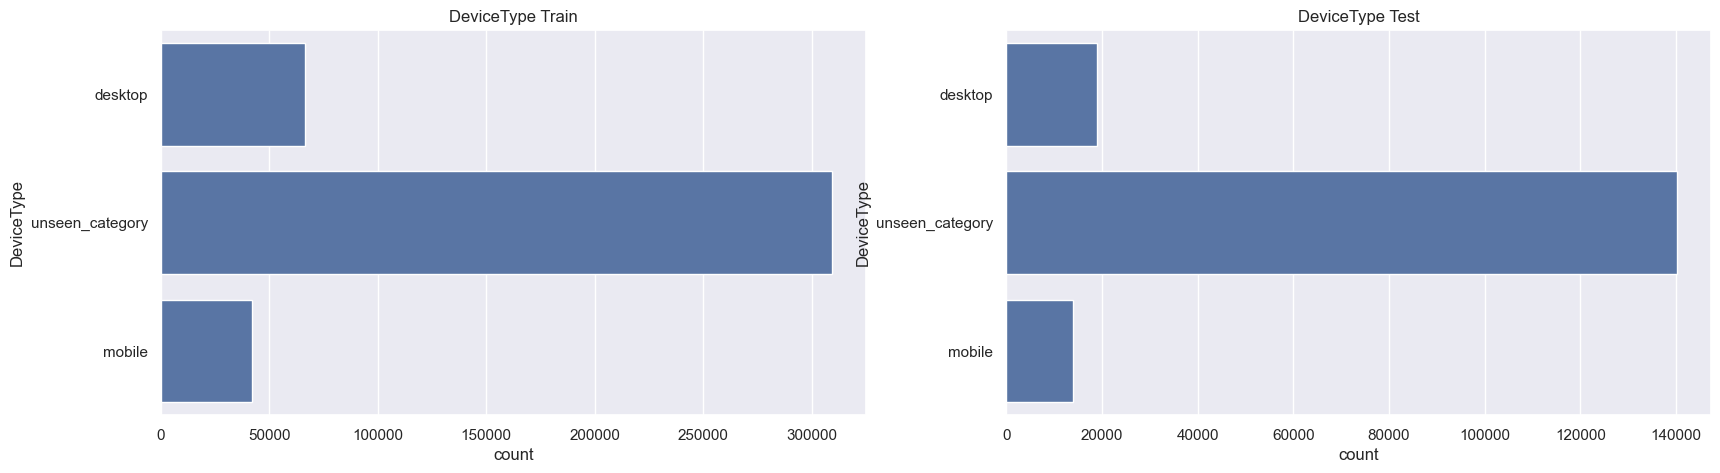

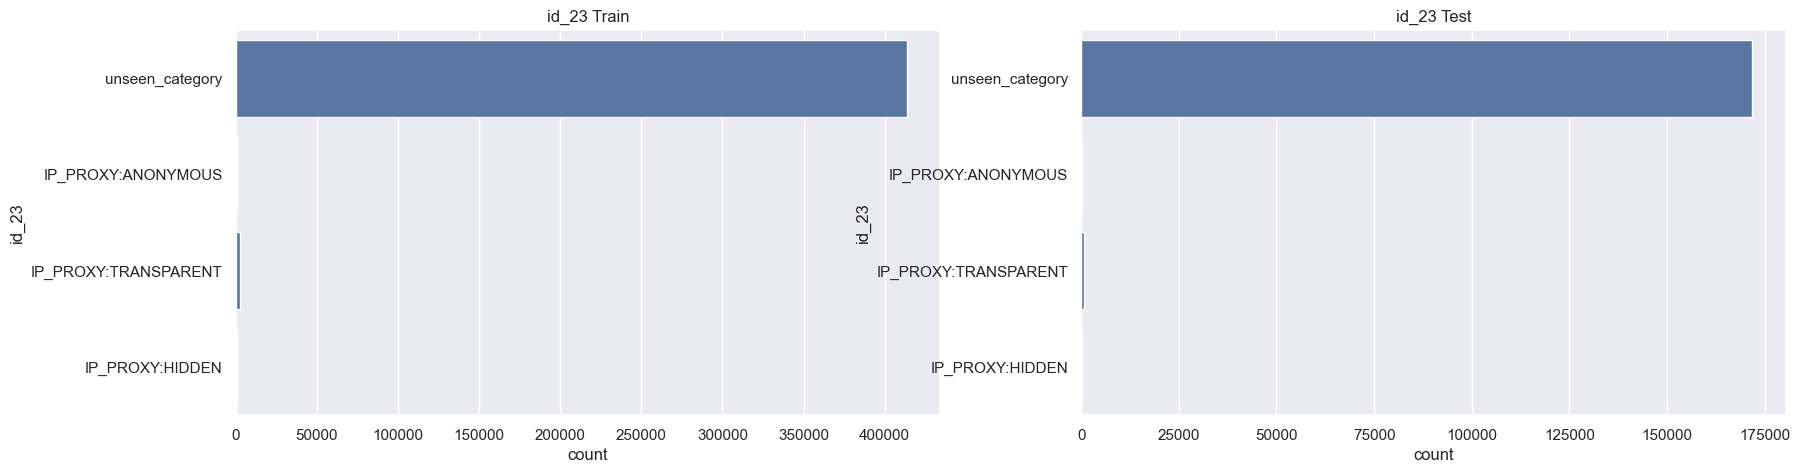

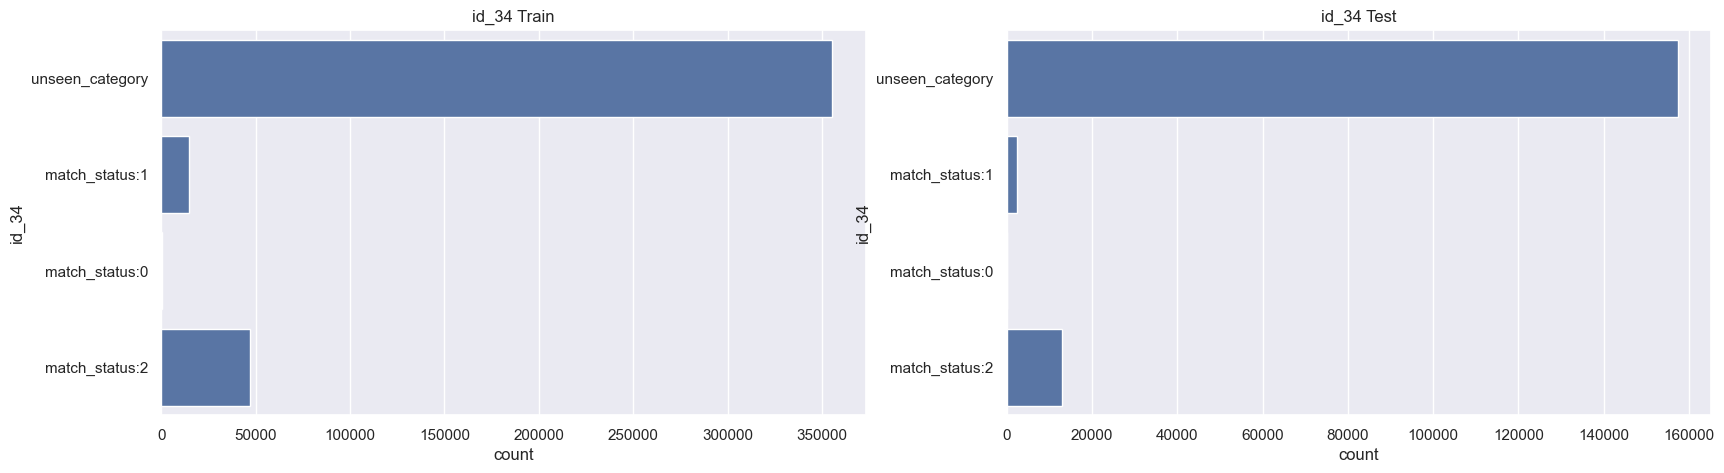

In [32]:
cols_target = ['ProductCD', 'card4', 'card6', 'DeviceType', 'id_23', 'id_34']

for col in cols_target:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    unique_values = [x for x in list(set(df_train[col].values).intersection(set(df_test[col].values))) if str(x) != 'nan']
    sns.countplot(y=col, ax=ax[0], data=df_train, order=unique_values)
    ax[0].set_title(col + ' Train')
    sns.countplot(y=col, ax=ax[1], data=df_test, order=unique_values)
    ax[1].set_title(col + ' Test')
    plt.show()

In [33]:
cols_target = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33']

for col in cols_target:
    train_unique = df_train[col].unique()
    test_unique = df_test[col].unique()
    print(f"{col} Новых значений в тесте: {len([val for val in test_unique if val not in train_unique ])}")

P_emaildomain Новых значений в тесте: 0
R_emaildomain Новых значений в тесте: 0
id_30 Новых значений в тесте: 4
id_31 Новых значений в тесте: 20
id_33 Новых значений в тесте: 77


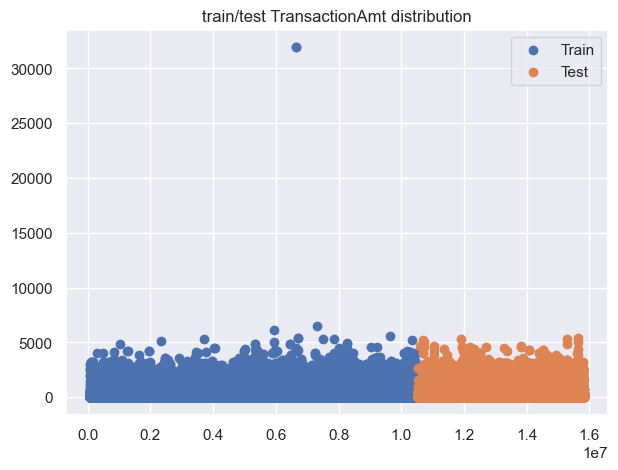

In [34]:
plt.figure(figsize=(7, 5))
plt.title('train/test TransactionAmt distribution')
plt.scatter(df_train['TransactionDT'], df_train['TransactionAmt'], label='Train')
plt.scatter(df_test['TransactionDT'], df_test['TransactionAmt'], label='Test')
plt.legend(loc='best')
plt.show()

Данные в трейне и тесте не сильно отличаются друг от друга, для категориальных признаков в тесте встречаются новые значения, поэтому нужно аккуратно подходить к кодированию признаков

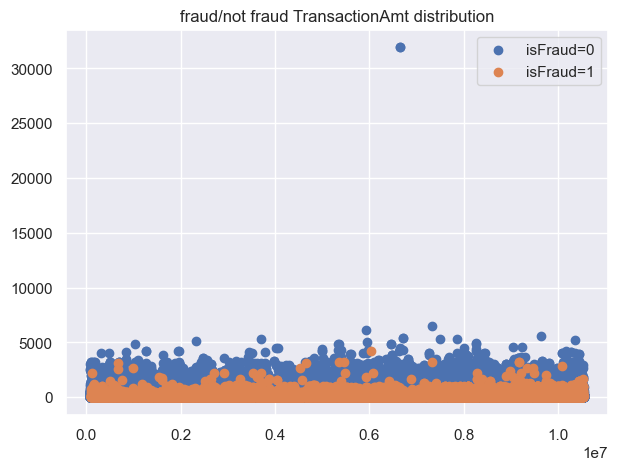

In [35]:
plt.figure(figsize=(7, 5))
plt.title('fraud/not fraud TransactionAmt distribution')
plt.scatter(df_train[df_train['isFraud']==0]['TransactionDT'], df_train[df_train['isFraud']==0]['TransactionAmt'], label='isFraud=0')
plt.scatter(df_train[df_train['isFraud']==1]['TransactionDT'], df_train[df_train['isFraud']==1]['TransactionAmt'], label='isFraud=1')
plt.legend(loc='best')
plt.show()

Добавим новые признаки по идеи из https://colab.research.google.com/drive/1pg1xZa8koJeUaZA35e7g1ISGqNlHDHZW#scrollTo=-SIcjRnVTkw9

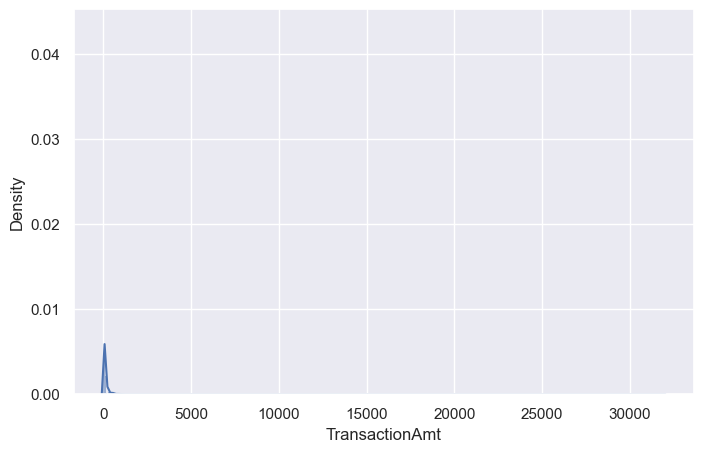

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train['TransactionAmt'], kde=True, stat="density", kde_kws=dict(cut=5))
plt.show()

Распределение смещено влево, стоит прологарифмировать признак...

In [37]:
train_amt_log = np.log1p(df_train['TransactionAmt'])
test_amt_log = np.log1p(df_test['TransactionAmt'])
df_train['TransactionAmt_log'] = train_amt_log
df_test['TransactionAmt_log'] = test_amt_log

C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\3125641404.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['TransactionAmt_log'] = train_amt_log
C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\3125641404.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TransactionAmt_log'] = test_amt_log


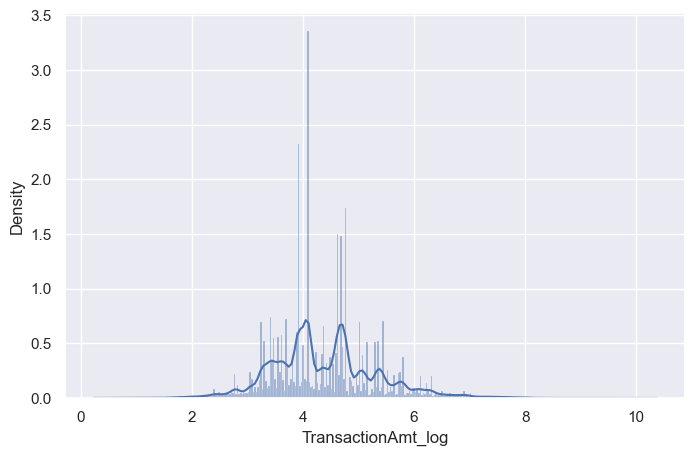

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train['TransactionAmt_log'], kde=True, stat="density")
plt.show()

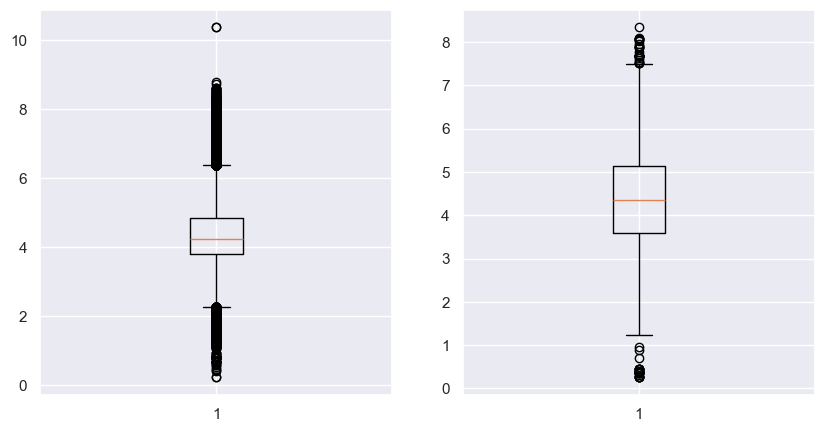

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].boxplot(df_train[df_train['isFraud']==0]['TransactionAmt_log'])
axes[1].boxplot(df_train[df_train['isFraud']==1]['TransactionAmt_log'])
plt.show()

In [40]:
df_train[df_train['isFraud']==1]['TransactionAmt'].mean(), df_train[df_train['isFraud']==0]['TransactionAmt'].mean()

(146.4808, 134.23482)

По графику видно, что обычные транзакции часто встречаются с большей суммой перевода, чем мошеннические, но сумма в USD мошеннической транзакции в среднем превышает сумму обычной транзакции

Также стоит добавить новые признаки: Количество центов в транзакции и наличие центов в транзакции

In [41]:
train_cents = np.modf(df_train['TransactionAmt'])[0] * 100
df_train['TransactionAmt_Cents'] = train_cents

test_cents = np.modf(df_test['TransactionAmt'])[0] * 100
df_test['TransactionAmt_Cents'] = test_cents

C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\1126902203.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['TransactionAmt_Cents'] = train_cents
C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\1126902203.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TransactionAmt_Cents'] = test_cents


In [42]:
df_train['TransactionAmt_HasCents'] = df_train['TransactionAmt_Cents'].map(lambda c: 1 if c > 0 else 0)
df_test['TransactionAmt_HasCents'] = df_test['TransactionAmt_Cents'].map(lambda c: 1 if c > 0 else 0)

C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\2097573205.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['TransactionAmt_HasCents'] = df_train['TransactionAmt_Cents'].map(lambda c: 1 if c > 0 else 0)
C:\Users\Kulitskov\AppData\Local\Temp\ipykernel_9188\2097573205.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TransactionAmt_HasCents'] = df_test['TransactionAmt_Cents'].map(lambda c: 1 if c > 0 else 0)


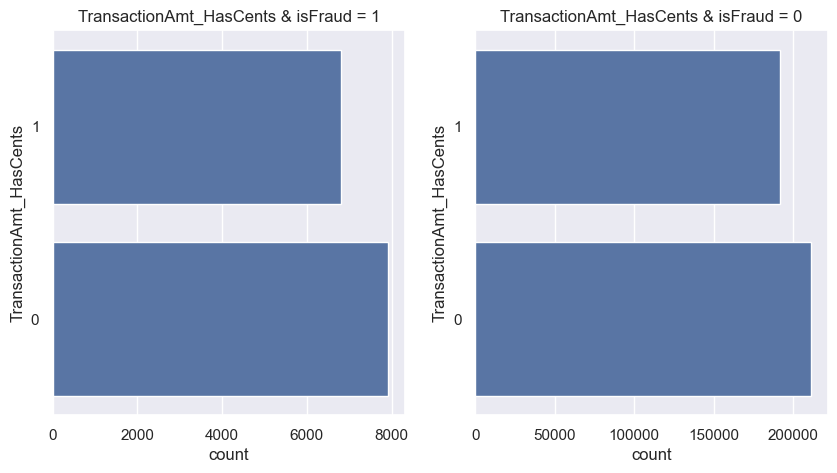

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(y='TransactionAmt_HasCents', ax=ax[0], data=df_train.loc[df_train['isFraud'] == 1], order=[1, 0])
ax[0].set_title('TransactionAmt_HasCents & isFraud = 1')
sns.countplot(y='TransactionAmt_HasCents', ax=ax[1], data=df_train.loc[df_train['isFraud'] == 0], order=[1, 0])
ax[1].set_title('TransactionAmt_HasCents & isFraud = 0')
plt.show()

Catboost умеет работать с категориальными столбцами, но стоит попробовать еще и другие модели. Поэтому сделаю копию с закодированными признаками.  
Закодирую признаки с помощью OneHotEncoding, а признаки с большим количеством категорий с помощью TargetEncoding

Чтобы не создавать лишние столбцы проверю, где в тесте все категории входят в категории трейна. Для таких категорий сделаю drop_first.  
Также есть признаки с большим количеством категорий, такие категории лучше закодировать другим способом

In [44]:
categorical_cols = df_train.select_dtypes('object').columns

drop_first_cols=[]
full_cols=[]
target_en_cols=[]
for col in categorical_cols:
    train_unique = df_train[col].unique()
    test_unique = df_test[col].unique()
    only_test_unique = len([val for val in test_unique if val not in train_unique ])
    if (len(train_unique) + only_test_unique) > 10:
        target_en_cols.append(col)
    elif only_test_unique == 0:
        drop_first_cols.append(col)
    else:
        full_cols.append(col)

In [45]:
df_train_enc = df_train.copy()
df_test_enc = df_test.copy()

In [46]:
te = TargetEncoder(smoothing=1)
for col in target_en_cols:
    df_train_enc[col] = te.fit_transform(df_train_enc[col], df_train_enc['isFraud'])
    df_train_enc.drop(col, axis=1, inplace=True)
    df_test_enc[col] = te.transform(df_test_enc[col])
    df_test_enc.drop(col, axis=1, inplace=True)

In [47]:
ohe_drop_first = OneHotEncoder(drop='first', sparse_output=False)
ohe_drop_first.set_output(transform = "pandas")
for col in drop_first_cols:
    df_train_enc = pd.concat([df_train_enc, ohe_drop_first.fit_transform(df_train_enc[[col]])], axis=1)
    df_train_enc.drop(col, axis=1, inplace=True)
    df_test_enc = pd.concat([df_test_enc, ohe_drop_first.transform(df_test_enc[[col]])], axis=1)
    df_test_enc.drop(col, axis=1, inplace=True)

In [48]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.set_output(transform = "pandas")
for col in full_cols:
    df_train_enc = pd.concat([df_train_enc, ohe.fit_transform(df_train_enc[[col]])], axis=1)
    df_train_enc.drop(col, axis=1, inplace=True)
    df_test_enc = pd.concat([df_test_enc, ohe.transform(df_test_enc[[col]])], axis=1)
    df_test_enc.drop(col, axis=1, inplace=True)

In [49]:
df_train_enc.shape, df_test_enc.shape

((417559, 467), (172981, 466))

In [50]:
df_train.shape, df_test.shape

((417559, 437), (172981, 436))

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [51]:
X_train = df_train.drop('isFraud', axis=1)
X_train_enc = df_train_enc.drop('isFraud', axis=1)
y_train = df_train['isFraud']

## Catboost без кодированых признаков

In [52]:
categorical_features=[
    *[f'card{i}' for i in range(1, 7)], *[f'M{i}' for i in range(1, 10)],
    'ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain',
    'DeviceType', 'DeviceInfo', *[f'id_{i}' for i in range(12, 39)],
    'TransactionAmt_HasCents'
]
catboost = CatBoostClassifier(cat_features=categorical_features, random_state=42, iterations=10, verbose=False)

In [ ]:
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

params={
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, None],
    'depth': [4, 6, 10, 15, None],
    'l2_leaf_reg': [1, 3, 5, 7, 9, None]
}
catboost_rs = RandomizedSearchCV(catboost, params, n_iter=10, scoring=scorer, cv=cv, random_state=42)

In [54]:
catboost_rs.fit(X_train, y_train)
catboost_rs.best_params_, catboost_rs.best_score_

({'learning_rate': 0.3, 'l2_leaf_reg': 3, 'depth': 15}, 0.9109844484639794)

In [55]:
predictions = catboost_rs.predict(df_test)

In [56]:
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_cb.csv', index=False)

**На кросс-валидации - 0.9109844484639794**  
**На лидерборде - 0.64298**  

## LightGBM с закодированными ранее признаками и с признаками, закодированными с помощью LabelEncoder

In [57]:
from sklearn.preprocessing import LabelEncoder

X_train_label_enc = X_train.copy()
X_test_label_enc = df_test

obj_cols = X_train.select_dtypes('object').columns
for col in obj_cols:
    le = LabelEncoder()
    le.fit(list(df_train[col]) + list(df_test[col]))
    X_train_label_enc[col] = le.transform(df_train[col])
    X_test_label_enc[col] = le.transform(df_test[col])

In [58]:
lgbm = LGBMClassifier(random_state=42, objective='binary', force_row_wise=True)

In [59]:
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

params={
    'learning_rate': [0.03, 0.05, 0.1, 0.3],
    'reg_alpha': [0, 0.5, 1, 3, 5],
    'max_depth': [-1, 10, 15],
    'min_child_samples': [10, 20, 90, 120],
    'num_leaves': [10, 31, 100, 150],
    'n_estimators': [10, 30, 100]
}
lgbm_rs = RandomizedSearchCV(lgbm, params, n_iter=10, scoring=scorer, cv=cv, random_state=42)

In [60]:
lgbm_rs.fit(X_train_label_enc, y_train)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 35131
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 434
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 35283
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 434
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.309261
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 35159
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 434
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.30

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(force_row_wise=True,
                                            objective='binary',
                                            random_state=42),
                   param_distributions={'learning_rate': [0.03, 0.05, 0.1, 0.3],
                                        'max_depth': [-1, 10, 15],
                                        'min_child_samples': [10, 20, 90, 120],
                                        'n_estimators': [10, 30, 100],
                                        'num_leaves': [10, 31, 100, 150],
                                        'reg_alpha': [0, 0.5, 1, 3, 5]},
                   random_state=42,
                   scoring=make_scorer(roc_auc_score, response_method='predict_proba'))

In [61]:
lgbm_rs.best_params_, lgbm_rs.best_score_

({'reg_alpha': 0,
  'num_leaves': 100,
  'n_estimators': 100,
  'min_child_samples': 90,
  'max_depth': 10,
  'learning_rate': 0.05},
 0.9331343407467486)

In [62]:
predictions = lgbm_rs.predict(X_test_label_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lgbm.csv', index=False)

**На кросс-валидации** - **0.9331343407467486**  
**На лидерборде** - **0.67109**

## lgbm на ранее закодированных признаках

In [63]:
X_train_enc = X_train_enc.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test_enc = df_test_enc.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [64]:
lgbm_rs.fit(X_train_enc, y_train)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 34585
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34733
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.309261
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34610
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.30

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(force_row_wise=True,
                                            objective='binary',
                                            random_state=42),
                   param_distributions={'learning_rate': [0.03, 0.05, 0.1, 0.3],
                                        'max_depth': [-1, 10, 15],
                                        'min_child_samples': [10, 20, 90, 120],
                                        'n_estimators': [10, 30, 100],
                                        'num_leaves': [10, 31, 100, 150],
                                        'reg_alpha': [0, 0.5, 1, 3, 5]},
                   random_state=42,
                   scoring=make_scorer(roc_auc_score, response_method='predict_proba'))

In [65]:
lgbm_rs.best_params_, lgbm_rs.best_score_

({'reg_alpha': 0,
  'num_leaves': 100,
  'n_estimators': 100,
  'min_child_samples': 90,
  'max_depth': 10,
  'learning_rate': 0.05},
 0.9325819760635167)

In [66]:
predictions = lgbm_rs.predict(df_test_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lgbm_enc.csv', index=False)

**На кросс-валидации** - **0.9325819760635167**  
**На лидерборде - 0.67447**  

Ограничем максимальную глубину деревьев и уменьшим количество признаков с помощью PCА

In [67]:
lgbm_pca = Pipeline(steps=[
    ('pca', PCA(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42, objective='binary', force_row_wise=True))
])

In [68]:
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

params={
    'pca__n_components': [0.7, 0.8, 0.9],
    'lgbm__learning_rate': [0.1, 0.3],
    'lgbm__reg_alpha': [0.5, 1, 3, 5],
    'lgbm__max_depth': [5, 10, 15, 25],
    'lgbm__min_child_samples': [10, 20, 90, 120, 150],
    'lgbm__num_leaves': [10, 31, 100, 150],
    'lgbm__n_estimators': [10, 20, 40]
}
pca_lgbm_rs = RandomizedSearchCV(lgbm_pca, params, n_iter=10, scoring=scorer, cv=cv, random_state=42)

In [69]:
pca_lgbm_rs.fit(X_train_enc, y_train)

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322270
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035256 -> initscore=-3.309241
[LightGBM] [Info] Start training from score -3.309241


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11776, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035253 -> initscore=-3.309329
[LightGBM] [Info] Start training from score -3.309329


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11777, number of negative: 322271
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334048, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309244
[LightGBM] [Info] Start training from score -3.309244


c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('lgbm',
                                              LGBMClassifier(force_row_wise=True,
                                                             objective='binary',
                                                             random_state=42))]),
                   param_distributions={'lgbm__learning_rate': [0.1, 0.3],
                                        'lgbm__max_depth': [5, 10, 15, 25],
                                        'lgbm__min_child_samples': [10, 20, 90,
                                                                    120, 150],
                                        'lgbm__n_estimators': [10, 20, 40],
                                        'lgbm__num_leaves': [10, 31, 100, 150],
                                        'lgbm__reg_alpha': [0.5, 1, 3, 5],
                                        'pca__n_components': [0.7, 0.8, 0.9]},
                   random_state=42,
                   scoring=make_scorer(roc_auc_score, response_method='predict_proba'))

In [70]:
pca_lgbm_rs.best_params_, pca_lgbm_rs.best_score_

({'pca__n_components': 0.7,
  'lgbm__reg_alpha': 3,
  'lgbm__num_leaves': 150,
  'lgbm__n_estimators': 10,
  'lgbm__min_child_samples': 20,
  'lgbm__max_depth': 25,
  'lgbm__learning_rate': 0.3},
 0.5911279925070272)

In [71]:
predictions = pca_lgbm_rs.predict(df_test_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_PCA_lgbm_enc.csv', index=False)

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**кросс-валидации - 0.5911279925070272**  
**На лидерборде - 0.5** 

## Log Reg L1

In [72]:
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
scaler = StandardScaler()
log_reg = LogisticRegression(penalty='l1', solver='saga')

params = {'C': [0.1, 1, 10]}

lr_gs = GridSearchCV(log_reg, params, cv=cv, scoring=scorer)
lr_gs_pipeline = Pipeline([
    ("scaler", scaler),
    ("classifier", lr_gs)
    ])

In [73]:
lr_gs_pipeline.fit(X_train_enc, y_train)
lr_gs.best_params_, lr_gs.best_score_

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reac

({'C': 10}, 0.8447949499016184)

In [74]:
predictions = lr_gs_pipeline.predict(df_test_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lr_enc.csv', index=False)

Логистическая регрессия **на кросс-валидации** показала roc-auc = **0.8447949499016184**  
**На лидерборде - 0.58904**

Можно проверить, каким признакам логистическая регрессия выдала большие веса...

In [75]:
lr_weights = pd.DataFrame(lr_gs.best_estimator_.coef_, columns=X_train_enc.columns).T
lr_weights[0] = lr_weights.abs()
lr_weights.sort_values(by=0, ascending=False).head(20)

,0
V257,0.110242
V45,0.101243
V201,0.096204
V258,0.094805
V246,0.088479
card3,0.087045
V223,0.083583
V200,0.081807
ProductCD_R,0.079961
TransactionAmt_log,0.077951


В признаках с большими весами присутствует TransactionAmt_log - это один из добавленных признаков! Также основной вклад вносят сгенерированные вручную признаки на основе ранжирования, подсчета и других методов, а также информация о платежной карте

Ниже приведена таблица с результатами обученных моделей

|Модель|Гиперпараметры|Кросс-валидация|Лидерборд|
|:--:|:--:|:--:|:--:|
|CatBoost|'learning_rate': 0.3, 'l2_leaf_reg': 3, 'depth': 15|0.91098|0.64298|
|LightGBM|'reg_alpha': 1, 'num_leaves': 100, 'n_estimators': 100, 'min_child_samples': 90,  'max_depth': -1, 'learning_rate': 0.3|0.93313|0.67109|
|LightGBM закодированные признаки|'reg_alpha': 1, 'num_leaves': 100, 'n_estimators': 100, 'min_child_samples': 90,  'max_depth': -1, 'learning_rate': 0.3|0.93258|0.67447|
|PCA+LightGBM закодированные признаки|**PCA**:'n_components': 0.7; **LightGBM**: 'reg_alpha': 3, 'num_leaves': 150, 'n_estimators': 10, 'min_child_samples': 20, 'max_depth': 25, 'learning_rate': 0.3|0.59112|0.5|
|LogisticRegression закодированные признаки|'C': 10, 'penalty':'l1', 'solver':'saga'|0.84479|0.58904|

LightGBM (обычный и с закодированными признаками) – лучшие
→ Градиентный бустинг хорошо работает с табличными данными, а кодирование признаков улучшает их обработку

CatBoost – достойный, но слабее LightGBM
→ Хорошо работает с категориальными признаками, но параметры могли быть менее оптимальными

PCA + LightGBM – провал
→ PCA уменьшает размерность, но теряет важные признаки, ухудшая обучение LightGBM

Logistic Regression – слабый результат
→ Линейная модель плохо справляется со сложными зависимостями, уступая бустингу

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

Попробую использовать IsolationForest для нахождения аномалий

In [76]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

In [77]:
iso_forest.fit(X_train_enc)
y_pred = iso_forest.predict(X_train_enc)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    402838
           1       0.24      0.07      0.11     14721

    accuracy                           0.96    417559
   macro avg       0.60      0.53      0.54    417559
weighted avg       0.94      0.96      0.95    417559



IsolationForest находит аномалии, они редко являются целевой переменной.

In [ ]:
# добавим аномалию как признак
X_train_anomaly = X_train_enc.copy()
X_test_anomaly = df_test_enc.copy()

X_train_anomaly['is_anomaly'] = y_pred

test_anomaly = iso_forest.predict(df_test_enc)
test_anomaly = [1 if x == -1 else 0 for x in test_anomaly]
X_test_anomaly['is_anomaly'] = test_anomaly

In [80]:
lgbm = LGBMClassifier(random_state=42, objective='binary', force_row_wise=True)
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

params={
    'learning_rate': [0.03, 0.05, 0.1, 0.3],
    'reg_alpha': [0.5, 1, 3, 5],
    'max_depth': [-1, 10, 15],
    'min_child_samples': [10, 20, 90, 120],
    'num_leaves': [10, 31, 100, 150],
    'n_estimators': [10, 30, 100]
}
lgbm_rs = RandomizedSearchCV(lgbm, params, n_iter=5, scoring=scorer, cv=cv, random_state=42)

In [81]:
lgbm_rs.fit(X_train_anomaly, y_train)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 34589
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34737
[LightGBM] [Info] Number of data p

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(force_row_wise=True,
                                            objective='binary',
                                            random_state=42),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.1, 0.3],
                                        'max_depth': [-1, 10, 15],
                                        'min_child_samples': [10, 20, 90, 120],
                                        'n_estimators': [10, 30, 100],
                                        'num_leaves': [10, 31, 100, 150],
                                        'reg_alpha': [0.5, 1, 3, 5]},
                   random_state=42,
                   scoring=make_scorer(roc_auc_score, response_method='predict_proba'))

In [82]:
lgbm_rs.best_params_, lgbm_rs.best_score_

({'reg_alpha': 3,
  'num_leaves': 150,
  'n_estimators': 100,
  'min_child_samples': 90,
  'max_depth': -1,
  'learning_rate': 0.1},
 0.9540005239509805)

In [83]:
predictions = lgbm_rs.predict(X_test_anomaly)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lgb_anomaly.csv', index=False)

**На кросс-валидации - 0.9540005239509805**  
**На лидерборде - 0.68228**

Попробую удалить аномалии из датасета

In [84]:
X_train_anomaly_del = X_train_anomaly[X_train_anomaly['is_anomaly'] == 0].copy()
y_train_anomaly_del = y_train[X_train_anomaly['is_anomaly'] == 0]
X_train_anomaly_del.drop('is_anomaly', axis=1, inplace=True)

In [85]:
X_train_anomaly_del.shape

(413383, 466)

In [86]:
lgbm_rs = RandomizedSearchCV(lgbm, params, n_iter=5, scoring=scorer, cv=cv, random_state=42)
lgbm_rs.fit(X_train_anomaly_del, y_train_anomaly_del)

[LightGBM] [Info] Number of positive: 9147, number of negative: 266441
[LightGBM] [Info] Total Bins 33026
[LightGBM] [Info] Number of data points in the train set: 275588, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033191 -> initscore=-3.371727
[LightGBM] [Info] Start training from score -3.371727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(force_row_wise=True,
                                            objective='binary',
                                            random_state=42),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.1, 0.3],
                                        'max_depth': [-1, 10, 15],
                                        'min_child_samples': [10, 20, 90, 120],
                                        'n_estimators': [10, 30, 100],
                                        'num_leaves': [10, 31, 100, 150],
                                        'reg_alpha': [0.5, 1, 3, 5]},
                   random_state=42,
                   scoring=make_scorer(roc_auc_score, response_method='predict_proba'))

In [87]:
lgbm_rs.best_params_, lgbm_rs.best_score_

({'reg_alpha': 3,
  'num_leaves': 150,
  'n_estimators': 100,
  'min_child_samples': 90,
  'max_depth': -1,
  'learning_rate': 0.1},
 0.9508991214433372)

Для LightGBM подбираются одинаковые гиперпараметры, поэтому дальше буду использовать приведенные выше гиперпараметры для экономии времени

In [88]:
predictions = lgbm_rs.predict(df_test_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lgb_anomaly_del.csv', index=False)

**На кросс-валидации - 0.9508991214433372**  
**На лидерборде - 0.68122**  
Удаление аномалий также немного улучшило метрики, но результат с указанием аномалии как нового признака показал результат лучше.

Также **попробую использовать LOF**, для нахождения аномалий. **Сперва выделю главные признаки с помощью PCA**, а после применю LOF для нахождения аномалий. Также LOF будет долго обучаться на всех данных, т.к. считает расстояние до точек, поэтому для обучения возьму подвыборку.

In [89]:
scaler = StandardScaler()
X_train_scaled_enc = scaler.fit_transform(X_train_enc)
X_test_scaled_enc = scaler.transform(df_test_enc)

In [90]:
from sklearn.neighbors import LocalOutlierFactor

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled_enc)
X_test_pca = pca.transform(X_test_scaled_enc)

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto', metric="manhattan", novelty=True)

In [91]:
from sklearn.utils import resample

X_sample = resample(X_train_pca, n_samples=50000, random_state=42)

In [92]:
lof.fit(X_sample)

LocalOutlierFactor(metric='manhattan', novelty=True)

Повторю также как для IsolationForest - добавлю признак, а потом попробую удалить его

In [93]:
X_train_anomaly = X_train_enc.copy()
X_test_anomaly = df_test_enc.copy()

lof_scores = lof.decision_function(X_train_pca)
# Буду считать 5% за аномалию
threshold = np.percentile(lof_scores, 5)
y_pred = (lof_scores < threshold).astype(int)
X_train_anomaly['is_anomaly'] = y_pred

lof_scores = lof.decision_function(X_test_pca)
# Буду считать 5% за аномалию
threshold = np.percentile(lof_scores, 5)
y_pred = (lof_scores < threshold).astype(int)
X_test_anomaly['is_anomaly'] = y_pred

In [94]:
lgbm = LGBMClassifier(
    random_state=42,
    objective='binary',
    force_row_wise=True,
    reg_alpha=3,
    num_leaves=150,
    n_estimators=100,
    min_child_samples=90,
    max_depth=-1,
    learning_rate=0.1
    )
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [95]:
scores = cross_val_score(lgbm, X_train_anomaly, y_train, scoring=scorer, cv=cv)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 34587
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34735
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.309261
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34612
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.30

In [96]:
scores.max(), scores.mean()

(0.9578804174676211, 0.9539746624575591)

In [97]:
lgbm.fit(X_train_anomaly, y_train)
predictions = lgbm.predict(X_test_anomaly)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lof_anomaly.csv', index=False)

[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Total Bins 34555
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


**На кросс-валидации - 0.9578804174676211**  
**На лидерборде - 0.68027**  

Теперь попробую удалить полученные аномалии...

In [98]:
X_train_anomaly_del = X_train_anomaly[X_train_anomaly['is_anomaly'] == 0].copy()
y_train_anomaly_del = y_train[X_train_anomaly['is_anomaly'] == 0]
X_train_anomaly_del.drop('is_anomaly', axis=1, inplace=True)

In [99]:
scores = cross_val_score(lgbm, X_train_anomaly_del, y_train_anomaly_del, scoring=scorer, cv=cv)

[LightGBM] [Info] Number of positive: 8781, number of negative: 255673
[LightGBM] [Info] Total Bins 33780
[LightGBM] [Info] Number of data points in the train set: 264454, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033204 -> initscore=-3.371309
[LightGBM] [Info] Start training from score -3.371309
[LightGBM] [Info] Number of positive: 8781, number of negative: 255673
[LightGBM] [Info] Total Bins 33843
[LightGBM] [Info] Number of data points in the train set: 264454, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033204 -> initscore=-3.371309
[LightGBM] [Info] Start training from score -3.371309
[LightGBM] [Info] Number of positive: 8780, number of negative: 255674
[LightGBM] [Info] Total Bins 33800
[LightGBM] [Info] Number of data points in the train set: 264454, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033200 -> initscore=-3.371427
[LightGBM] [Info] Start training from score -3.37

In [100]:
scores.max(), scores.mean()

(0.95354638863508, 0.95177141837156)

In [101]:
lgbm.fit(X_train_anomaly_del, y_train_anomaly_del)
predictions = lgbm.predict(df_test_enc)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_lof_anomaly_del.csv', index=False)

[LightGBM] [Info] Number of positive: 13171, number of negative: 383510
[LightGBM] [Info] Total Bins 33875
[LightGBM] [Info] Number of data points in the train set: 396681, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033203 -> initscore=-3.371348
[LightGBM] [Info] Start training from score -3.371348


**На кросс-валидации - 0.95354638863508**  
**На лидерборде - 0.68269** - пока что лучший результат  

**Вывод:** **Поиск аномалий улучшил качество предсказания модели**. Вероятно, для лучшего результата стоит поработать с признаками датасета.

|Метод поиска аномалий|Удаление/Новый признак|Кросс-валидация|Лидерборд|
|:--:|:--:|:--:|:--:|
|IsolationForest|новый признак|0.95400|0.68228|
|IsolationForest|удаление|0.95089|0.68122|
|PCA+LOF|новый признак|0.95788|0.68027|
|PCA+LOF|удаление|0.95355|0.68269|

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [102]:
pca = PCA(n_components=2)
X_train_2pca = pca.fit_transform(X_train_scaled_enc)
X_test_2pca = pca.transform(X_test_scaled_enc)

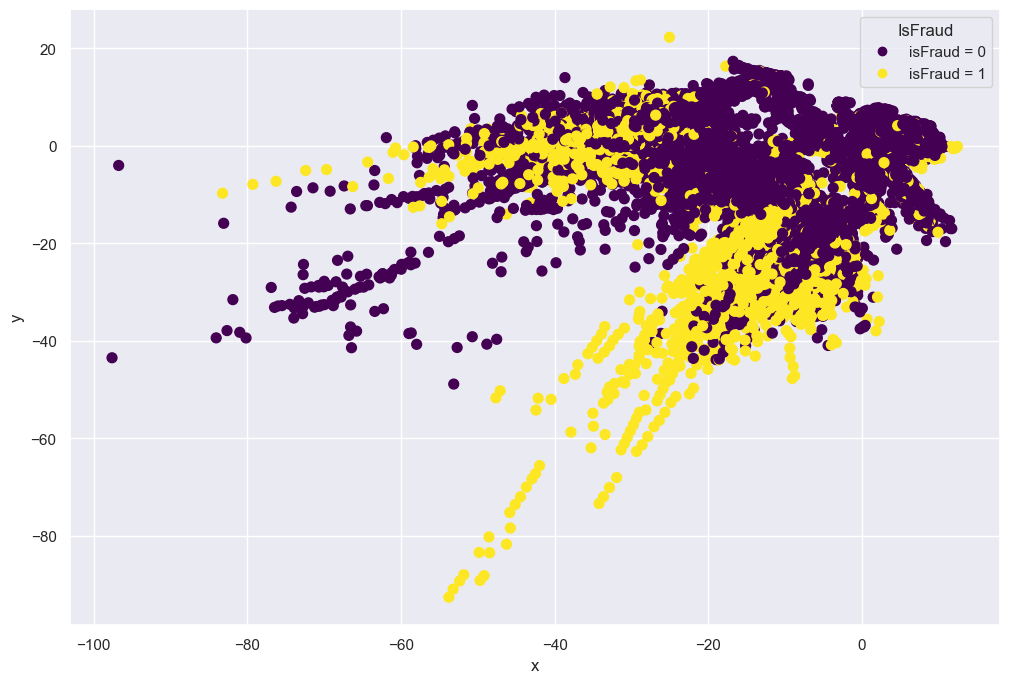

In [103]:
plt.figure(figsize=(12,8))
sc = plt.scatter(X_train_2pca[:,0], X_train_2pca[:,1], c=y_train, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

unique = np.unique(y_train)
handles, labels = sc.legend_elements()
plt.legend(handles, [f'isFraud = {c}' for c in unique], title="IsFraud")

plt.show()

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled_enc)

KMeans(n_clusters=2, random_state=42)

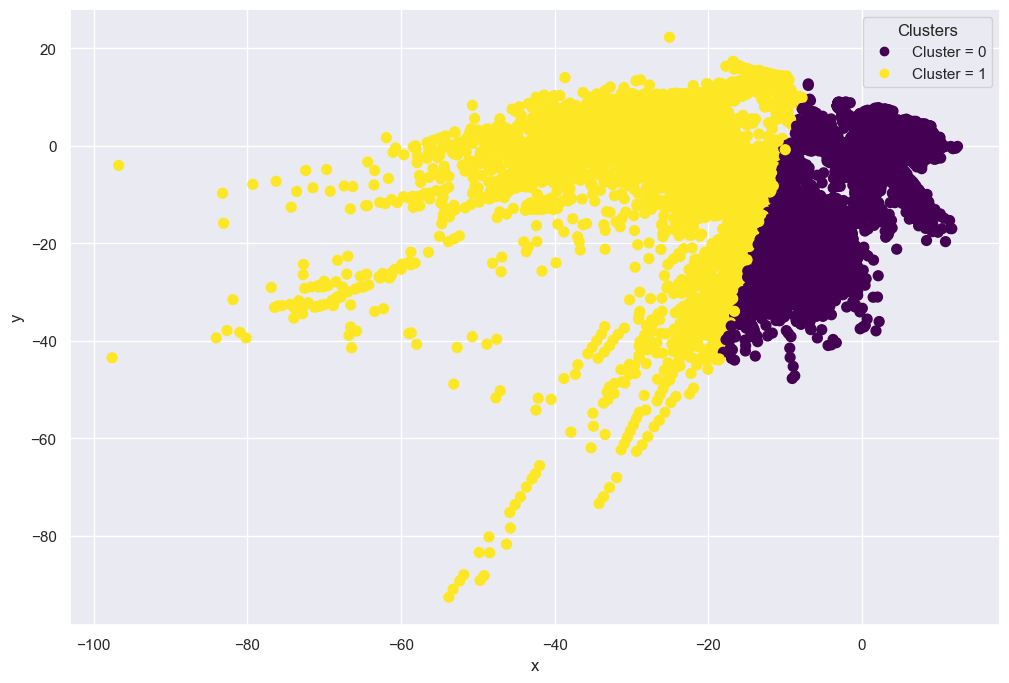

In [105]:
plt.figure(figsize=(12,8))
sc = plt.scatter(X_train_2pca[:,0], X_train_2pca[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

unique = np.unique(kmeans.labels_)
handles, labels = sc.legend_elements()
plt.legend(handles, [f'Cluster = {c}' for c in unique], title="Clusters")

plt.show()

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_scaled_enc)

KMeans(n_clusters=5, random_state=42)

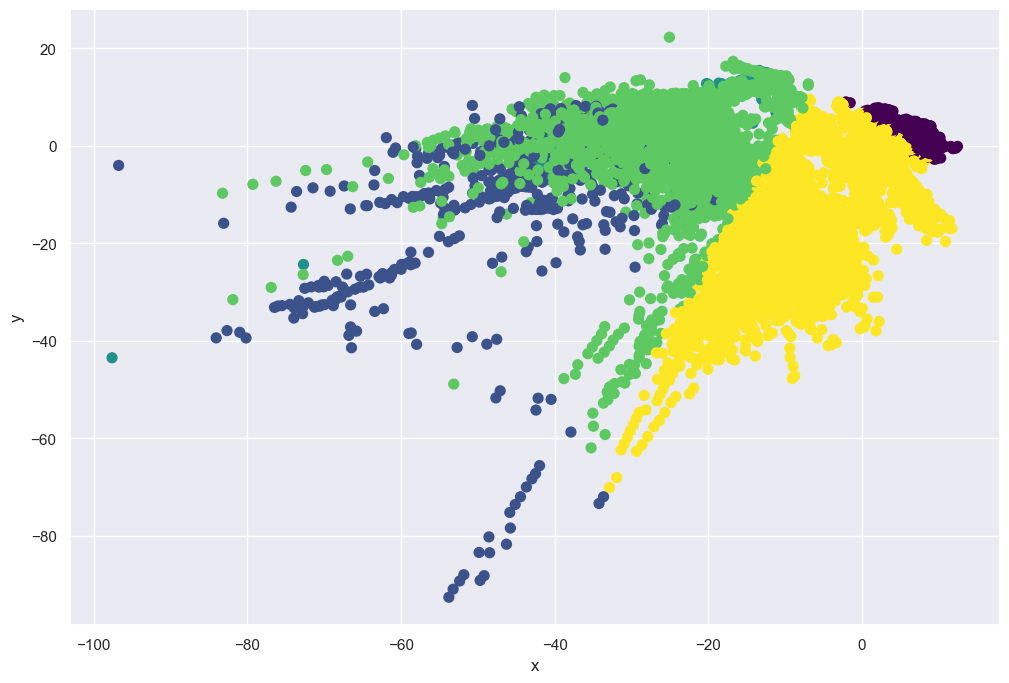

In [107]:
plt.figure(figsize=(12,8))
sc = plt.scatter(X_train_2pca[:,0], X_train_2pca[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [108]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [109]:
homogeneity_completeness_v_measure(y_train.to_numpy(), kmeans.labels_)

(0.02443973223734784, 0.0034393848991045176, 0.006030151212025679)

Метрики получились неудовлетворительными, поэтому стоит рассмотреть альтернативные методы кластеризации. В качестве эксперимента добавим полученные кластеры в качестве нового признака, закодированного с помощью TargetEncoder.

In [110]:
X_train_enc_cluster = X_train_enc.copy()
X_test_enc_cluster = df_test_enc.copy()

te = TargetEncoder(smoothing=1)

X_train_enc_cluster['cluster'] = kmeans.labels_.astype(str)
X_test_enc_cluster['cluster'] = kmeans.predict(X_test_scaled_enc).astype(str)

X_train_enc_cluster['cluster'] = te.fit_transform(X_train_enc_cluster['cluster'], y_train)
X_test_enc_cluster['cluster'] = te.transform(X_test_enc_cluster['cluster'])

In [111]:
lgbm = LGBMClassifier(
    random_state=42,
    objective='binary',
    force_row_wise=True,
    reg_alpha=3,
    num_leaves=150,
    n_estimators=100,
    min_child_samples=90,
    max_depth=-1,
    learning_rate=0.1
    )
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [112]:
scores = cross_val_score(lgbm, X_train_enc_cluster, y_train, scoring=scorer, cv=cv)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 34591
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34739
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.309261
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34616
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.30

In [113]:
scores.max(), scores.mean()

(0.9579177413965244, 0.954060252600863)

In [114]:
lgbm.fit(X_train_enc_cluster, y_train)
predictions = lgbm.predict(X_test_enc_cluster)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_kmeans.csv', index=False)

[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Total Bins 34559
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 463
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


**На кросс-валидации - 0.954060252600863**  
**На лидерборде - 0.68059**  

## HDBSCAN

In [115]:
!pip install hdbscan -q


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import hdbscan

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled_enc)
X_test_pca = pca.transform(X_test_scaled_enc)

hdb = hdbscan.HDBSCAN(
    min_cluster_size=100,
    min_samples=10,
    metric='manhattan',
    cluster_selection_method='eom',
    prediction_data=True
)

In [117]:
clusters = hdb.fit_predict(X_train_pca)

c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kulitskov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


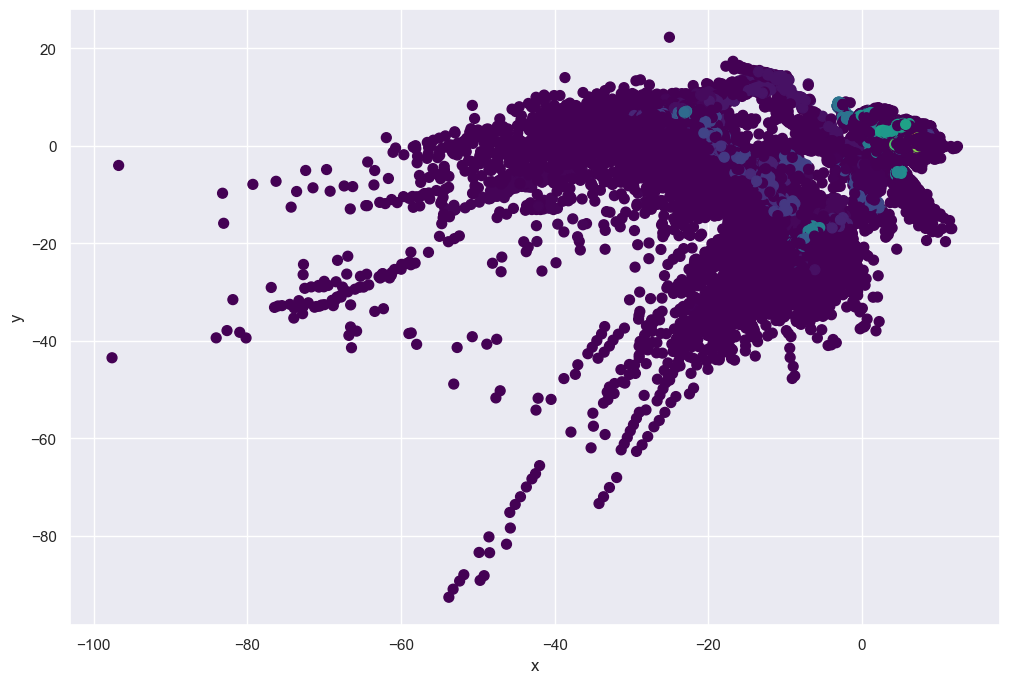

In [118]:
plt.figure(figsize=(12,8))
sc = plt.scatter(X_train_2pca[:,0], X_train_2pca[:,1], c=clusters, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [119]:
homogeneity_completeness_v_measure(y_train.to_numpy(), clusters)

(0.04994757934059024, 0.0030658469546621077, 0.0057770887382846406)

Метрики мягко говоря получились не очень

In [121]:
from hdbscan import approximate_predict

test_clusters = approximate_predict(hdb, X_test_pca)

In [122]:
X_train_enc_cluster = X_train_enc.copy()
X_test_enc_cluster = df_test_enc.copy()

X_train_enc_cluster['is_anomaly'] = [1 if i == -1 else 0 for i in clusters]
X_test_enc_cluster['is_anomaly'] = [1 if i == -1 else 0 for i in test_clusters[0]]

te = TargetEncoder(smoothing=1)

X_train_enc_cluster['cluster'] = clusters.astype(str)
X_test_enc_cluster['cluster'] = test_clusters[0].astype(str)

X_train_enc_cluster['cluster'] = te.fit_transform(X_train_enc_cluster['cluster'], y_train)
X_test_enc_cluster['cluster'] = te.transform(X_test_enc_cluster['cluster'])

In [123]:
lgbm = LGBMClassifier(
    random_state=42,
    objective='binary',
    force_row_wise=True,
    reg_alpha=3,
    num_leaves=150,
    n_estimators=100,
    min_child_samples=90,
    max_depth=-1,
    learning_rate=0.1
    )
scorer = make_scorer(roc_auc_score, response_method="predict_proba")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [124]:
scores = cross_val_score(lgbm, X_train_enc_cluster, y_train, scoring=scorer, cv=cv)

[LightGBM] [Info] Number of positive: 9814, number of negative: 268558
[LightGBM] [Info] Total Bins 34784
[LightGBM] [Info] Number of data points in the train set: 278372, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309257
[LightGBM] [Info] Start training from score -3.309257
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34932
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.309261
[LightGBM] [Info] Number of positive: 9814, number of negative: 268559
[LightGBM] [Info] Total Bins 34809
[LightGBM] [Info] Number of data points in the train set: 278373, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309261
[LightGBM] [Info] Start training from score -3.30

In [125]:
scores.max(), scores.mean()

(0.9572476104607731, 0.9540971570480897)

In [126]:
lgbm.fit(X_train_enc_cluster, y_train)
predictions = lgbm.predict(X_test_enc_cluster)
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_hgbm.csv', index=False)

[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Total Bins 34752
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


**На кросс-валидации - 0.9540971570480897**   
**На лидерборде - 0.68357**  

Получение новых признаков с помощью кластеризации дало небольшой прирост метрики roc-auc.

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

Попробую использовать AutoGlugon  
https://auto.gluon.ai/stable/index.html

In [127]:
!pip install autogluon -q

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.5.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='isFraud', path='autogluon_model', eval_metric='roc_auc')

In [129]:
train_data = X_train_enc.copy()
train_data['isFraud'] = y_train

In [130]:
predictor.fit(
    train_data=train_data,
    time_limit=1800,
    presets='high_quality'
    )

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          12
Memory Avail:       14.74 GB / 31.95 GB (46.1%)
Disk Space Avail:   168.73 GB / 465.75 GB (36.2%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting an

In [131]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.966562,roc_auc,150.957577,1112.808286,0.076278,8.012792,3,False,6
1,LightGBMXT_BAG_L2,0.966089,roc_auc,148.206353,1051.243504,17.383081,319.940158,2,False,4
2,LightGBM_BAG_L2,0.965162,roc_auc,133.498218,784.855336,2.674946,53.551991,2,False,5
3,LightGBMXT_BAG_L1,0.964066,roc_auc,125.834952,638.817741,125.834952,638.817741,1,False,1
4,WeightedEnsemble_L2,0.964066,roc_auc,125.909938,642.786288,0.074986,3.968547,2,False,3
5,LightGBM_BAG_L1,0.931197,roc_auc,4.988320,92.485605,4.988320,92.485605,1,False,2
6,WeightedEnsemble_L3_FULL,NaN,roc_auc,NaN,289.278587,NaN,8.012792,3,True,12
7,WeightedEnsemble_L2_FULL,NaN,roc_auc,NaN,166.441564,NaN,3.968547,2,True,9
8,LightGBM_BAG_L2_FULL,NaN,roc_auc,NaN,200.098860,NaN,13.387981,2,True,11
9,LightGBM_BAG_L1_FULL,NaN,roc_auc,NaN,24.237861,NaN,24.237861,1,True,8


In [132]:
predictions = predictor.predict(df_test_enc)

In [133]:
sub = pd.DataFrame({'TransactionID': df_test['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_automl.csv', index=False)

**На лидерборде  - 0.66503**  

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста